In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
####### Compare mesoscale and LES domains for one hurricane simulation ########
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              
import matplotlib.gridspec as gridspec


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_27 = "/projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_30 = "/projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_28 = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_32 = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/

dir_for_height = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/"

WRF_DIRS = [WRF_DIRECTORY_26,WRF_DIRECTORY_27,WRF_DIRECTORY_28,WRF_DIRECTORY_30,WRF_DIRECTORY_32]

# Choose which domain to evaluate
domains = ['d01','d02'] # ,'prec'

# Whether or not to save figures
saveFig = 'False'

# Vertical level to get max wind speed
i_z_max = 0

dirFig = "/projects/storm/mgomez/idealSims/Figures/"

# Whether or not to apply Gaussian filter to vertical velocity in LES domains
filt_w = False

# Whether or not to compare velocity fields from precursor
use_prec = False

In [3]:
#%% Turbine characteristics
z_hh = 90
D_turb = 126

In [4]:
#%% Common attributes
numSims = 5
azm = 100
zz = 29


In [5]:
#%% Load data for Domain d01

## Initialize arrays for Domain d01
rr = 200
UV_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
Ut_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
Un_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
w_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
z_d01 = np.zeros([numSims,zz]) + np.nan
r_d01 = np.zeros([numSims,rr]) + np.nan

for idir in np.arange(len(WRF_DIRS)):
    ## Load data for domain d01
    ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d01.nc",decode_times=False)
    UV_temp = np.array(ds['UV'])
    Ut_temp = np.array(ds['Ut'])
    Un_temp = np.array(ds['Un'])
    w_temp = np.array(ds['w'])
    z_temp = np.array(ds['w'].z)
    r_temp = np.array(ds['w'].r)
    ds.close()
    # Save data
    UV_d01[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
    Ut_d01[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
    Un_d01[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
    w_d01[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
    z_d01[idir,0:len(z_temp)] = z_temp
    r_d01[idir,0:len(r_temp)] = r_temp
    print('Done with domain d01 ' + str(WRF_DIRS[idir]))
    



Done with domain d01 /projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/


In [6]:
#%% Load data for Domain d02

## Initialize arrays for Domain d02
rr = 700
UV_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
Ut_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
Un_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
w_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
z_d02 = np.zeros([numSims,zz]) + np.nan
r_d02 = np.zeros([numSims,rr]) + np.nan

for idir in np.arange(len(WRF_DIRS)):
    ## Load data for domain d02
    ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d02.nc",decode_times=False)
    UV_temp = np.array(ds['UV'])
    Ut_temp = np.array(ds['Ut'])
    Un_temp = np.array(ds['Un'])
    w_temp = np.array(ds['w'])
    z_temp = np.array(ds['w'].z)
    r_temp = np.array(ds['w'].r)
    azmth = np.array(ds['w'].a)
    ds.close()
    # Save data
    UV_d02[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
    Ut_d02[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
    Un_d02[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
    w_d02[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
    z_d02[idir,0:len(z_temp)] = z_temp
    r_d02[idir,0:len(r_temp)] = r_temp
    print('Done with domain d02 ' + str(WRF_DIRS[idir]))

Done with domain d02 /projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/


In [7]:
#%% Load data for precursor domain

if use_prec:
    ## Initialize arrays for precursor domain
    rr = 50
    UV_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    Ut_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    Un_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    w_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    z_d03 = np.zeros([numSims,zz]) + np.nan
    r_d03 = np.zeros([numSims,rr]) + np.nan

    for idir in np.arange(len(WRF_DIRS)):
        ## Load data for domain d03
        ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d01_prec.nc",decode_times=False)
        UV_temp = np.array(ds['UV'])
        Ut_temp = np.array(ds['Ut'])
        Un_temp = np.array(ds['Un'])
        w_temp = np.array(ds['w'])
        z_temp = np.array(ds['w'].z)
        r_temp = np.array(ds['w'].r)
        ds.close()
        # Save data
        UV_d03[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
        Ut_d03[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
        Un_d03[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
        w_d03[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
        z_d03[idir,0:len(z_temp)] = z_temp
        r_d03[idir,0:len(r_temp)] = r_temp
        print('Done with domain d03 ' + str(WRF_DIRS[idir]))

In [8]:
# #%% Load data for Domain d04

# ## Initialize arrays for Domain d04
# rr = 400
# UV_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Ut_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Un_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# w_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# z_d04 = np.zeros([numSims,zz]) + np.nan
# r_d04 = np.zeros([numSims,rr]) + np.nan

# for idir in np.arange(len(WRF_DIRS)):
#     ## Load data for domain d04
#     ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d04.nc",decode_times=False)
#     UV_temp = np.array(ds['UV'])
#     Ut_temp = np.array(ds['Ut'])
#     Un_temp = np.array(ds['Un'])
#     w_temp = np.array(ds['w'])
#     z_temp = np.array(ds['w'].z)
#     r_temp = np.array(ds['w'].r)
#     ds.close()
#     # Save data
#     UV_d04[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
#     Ut_d04[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
#     Un_d04[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
#     w_d04[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
#     z_d04[idir,0:len(z_temp)] = z_temp
#     r_d04[idir,0:len(r_temp)] = r_temp
#     print('Done with domain d04 ' + str(WRF_DIRS[idir]))

In [9]:
# #%% Load data for Domain d05

# ## Initialize arrays for Domain d05
# rr = 710
# UV_d05 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Ut_d05 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Un_d05 = np.zeros([numSims,azm,zz,rr]) + np.nan
# w_d05 = np.zeros([numSims,azm,zz,rr]) + np.nan
# z_d05 = np.zeros([numSims,zz]) + np.nan
# r_d05 = np.zeros([numSims,rr]) + np.nan

# for idir in np.arange(len(WRF_DIRS)):
#     ## Load data for domain d05
#     ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d05.nc",decode_times=False)
#     UV_temp = np.array(ds['UV'])
#     Ut_temp = np.array(ds['Ut'])
#     Un_temp = np.array(ds['Un'])
#     w_temp = np.array(ds['w'])
#     z_temp = np.array(ds['w'].z)
#     r_temp = np.array(ds['w'].r)
#     ds.close()
#     # Save data
#     UV_d05[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
#     Ut_d05[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
#     Un_d05[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
#     w_d05[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
#     z_d05[idir,0:len(z_temp)] = z_temp
#     r_d05[idir,0:len(r_temp)] = r_temp
#     print('Done with domain d05 ' + str(WRF_DIRS[idir]))

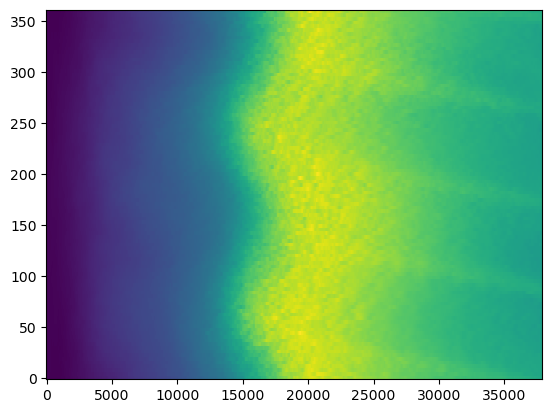

In [10]:
#%% Plan view of horizontal wind speed

isim = 2

plt.figure()
rr = r_d02[isim,:]
var = UV_d02[isim,:,0,:]
var = var[:,np.logical_not(np.isnan(rr))]
rr = rr[np.logical_not(np.isnan(rr))]
plt.pcolormesh(rr,azmth,var)
# plt.
# stop

In [11]:
#%% Restric azimuthal angles
restrict = False
if restrict:
    allow_azmth_26 = [300,50]
    allow_azmth_28 = [100,250]
    allow_azmth_30 = [150,250]
    allow_azmth_all = [allow_azmth_26,allow_azmth_30,allow_azmth_28]
    
    for isim in np.arange(numSims):
        if allow_azmth_all[isim][0]<allow_azmth_all[isim][1]:
            iaas = (azmth<allow_azmth_all[isim][0]) | (azmth>allow_azmth_all[isim][1])
        else:
            iaas = (azmth<allow_azmth_all[isim][0]) & (azmth>allow_azmth_all[isim][1])
        ## Domain d01
        UV_d01[isim,iaas,:,:] = np.nan
        Ut_d01[isim,iaas,:,:] = np.nan
        Un_d01[isim,iaas,:,:] = np.nan
        w_d01[isim,iaas,:,:] = np.nan
        ## Domain d02
        UV_d02[isim,iaas,:,:] = np.nan
        Ut_d02[isim,iaas,:,:] = np.nan
        Un_d02[isim,iaas,:,:] = np.nan
        w_d02[isim,iaas,:,:] = np.nan
        if use_prec:
            ## Domain d03
            UV_d03[isim,iaas,:,:] = np.nan
            Ut_d03[isim,iaas,:,:] = np.nan
            Un_d03[isim,iaas,:,:] = np.nan
            w_d03[isim,iaas,:,:] = np.nan
#         ## Domain d04
#         UV_d04[isim,iaas,:,:] = np.nan
#         Ut_d04[isim,iaas,:,:] = np.nan
#         Un_d04[isim,iaas,:,:] = np.nan
#         w_d04[isim,iaas,:,:] = np.nan
#         ## Domain d05
#         UV_d05[isim,iaas,:,:] = np.nan
#         Ut_d05[isim,iaas,:,:] = np.nan
#         Un_d05[isim,iaas,:,:] = np.nan
#         w_d05[isim,iaas,:,:] = np.nan

#         print(azmth[iaas])
        


In [12]:
#%% Average fields azimuthally
mean_ = True
if mean_:
    ## Domain d01
    UV_azm_d01 = np.nanmean(UV_d01,axis=1)
    Ut_azm_d01 = np.nanmean(Ut_d01,axis=1)
    Un_azm_d01 = np.nanmean(Un_d01,axis=1)
    w_azm_d01 = np.nanmean(w_d01,axis=1)

    ## Domain d02
    UV_azm_d02 = np.nanmean(UV_d02,axis=1)
    Ut_azm_d02 = np.nanmean(Ut_d02,axis=1)
    Un_azm_d02 = np.nanmean(Un_d02,axis=1)
    w_azm_d02 = np.nanmean(w_d02,axis=1)

    if use_prec:
        ## Domain d03
        UV_azm_d03 = np.nanmean(UV_d03,axis=1)
        Ut_azm_d03 = np.nanmean(Ut_d03,axis=1)
        Un_azm_d03 = np.nanmean(Un_d03,axis=1)
        w_azm_d03 = np.nanmean(w_d03,axis=1)

    # ## Domain d04
    # UV_azm_d04 = np.nanmean(UV_d04,axis=1)
    # Ut_azm_d04 = np.nanmean(Ut_d04,axis=1)
    # Un_azm_d04 = np.nanmean(Un_d04,axis=1)
    # w_azm_d04 = np.nanmean(w_d04,axis=1)

    # ## Domain d05
    # UV_azm_d05 = np.nanmean(UV_d05,axis=1)
    # Ut_azm_d05 = np.nanmean(Ut_d05,axis=1)
    # Un_azm_d05 = np.nanmean(Un_d05,axis=1)
    # w_azm_d05 = np.nanmean(w_d05,axis=1)
else:
    ## Domain d01
    UV_azm_d01 = np.nanmedian(UV_d01,axis=1)
    Ut_azm_d01 = np.nanmedian(Ut_d01,axis=1)
    Un_azm_d01 = np.nanmedian(Un_d01,axis=1)
    w_azm_d01 = np.nanmedian(w_d01,axis=1)

    ## Domain d02
    UV_azm_d02 = np.nanmedian(UV_d02,axis=1)
    Ut_azm_d02 = np.nanmedian(Ut_d02,axis=1)
    Un_azm_d02 = np.nanmedian(Un_d02,axis=1)
    w_azm_d02 = np.nanmedian(w_d02,axis=1)

    if use_prec:
        ## Domain d03
        UV_azm_d03 = np.nanmedian(UV_d03,axis=1)
        Ut_azm_d03 = np.nanmedian(Ut_d03,axis=1)
        Un_azm_d03 = np.nanmedian(Un_d03,axis=1)
        w_azm_d03 = np.nanmedian(w_d03,axis=1)

    # ## Domain d04
    # UV_azm_d04 = np.nanmedian(UV_d04,axis=1)
    # Ut_azm_d04 = np.nanmedian(Ut_d04,axis=1)
    # Un_azm_d04 = np.nanmedian(Un_d04,axis=1)
    # w_azm_d04 = np.nanmedian(w_d04,axis=1)

    # ## Domain d05
    # UV_azm_d05 = np.nanmedian(UV_d05,axis=1)
    # Ut_azm_d05 = np.nanmedian(Ut_d05,axis=1)
    # Un_azm_d05 = np.nanmedian(Un_d05,axis=1)
    # w_azm_d05 = np.nanmedian(w_d05,axis=1)

/tmp/ipykernel_2096981/351747154.py:5: RuntimeWarning: Mean of empty slice
  UV_azm_d01 = np.nanmean(UV_d01,axis=1)
/tmp/ipykernel_2096981/351747154.py:6: RuntimeWarning: Mean of empty slice
  Ut_azm_d01 = np.nanmean(Ut_d01,axis=1)
/tmp/ipykernel_2096981/351747154.py:7: RuntimeWarning: Mean of empty slice
  Un_azm_d01 = np.nanmean(Un_d01,axis=1)
/tmp/ipykernel_2096981/351747154.py:8: RuntimeWarning: Mean of empty slice
  w_azm_d01 = np.nanmean(w_d01,axis=1)
/tmp/ipykernel_2096981/351747154.py:11: RuntimeWarning: Mean of empty slice
  UV_azm_d02 = np.nanmean(UV_d02,axis=1)
/tmp/ipykernel_2096981/351747154.py:12: RuntimeWarning: Mean of empty slice
  Ut_azm_d02 = np.nanmean(Ut_d02,axis=1)
/tmp/ipykernel_2096981/351747154.py:13: RuntimeWarning: Mean of empty slice
  Un_azm_d02 = np.nanmean(Un_d02,axis=1)
/tmp/ipykernel_2096981/351747154.py:14: RuntimeWarning: Mean of empty slice
  w_azm_d02 = np.nanmean(w_d02,axis=1)


In [13]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
colores = [col_26,col_28,col_30]
colores = ['steelblue','tab:green','goldenrod','firebrick','tab:purple']

labels = ['26','27','28','30','32']
labels_cat = ['1','2','3','4','5']

## Radius of maximum wind speed

In [14]:
#%% Find radius of maximum wind speed for each domain and each simulation

# Height to define radius of maximum winds
iz = 0

# Initialize arrays
R_d01 = np.zeros([numSims])
R_d02 = np.zeros([numSims])
R_d03 = np.zeros([numSims])
# R_d04 = np.zeros([numSims])
# R_d05 = np.zeros([numSims])

# Find radius of maximum wind speed
for isim in np.arange(numSims):
    ## Domain d01
    R_d01[isim] = r_d01[isim,np.nanargmax(UV_azm_d01[isim,iz,:])]
    ## Domain d02
    R_d02[isim] = r_d02[isim,np.nanargmax(UV_azm_d02[isim,iz,:])]
    if use_prec:
        ## Domain d03
        R_d03[isim] = r_d03[isim,np.nanargmax(UV_azm_d03[isim,iz,:])]
#     ## Domain d04
#     R_d04[isim] = r_d04[isim,np.nanargmax(UV_azm_d04[isim,iz,:])]
#     ## Domain d05
#     R_d05[isim] = r_d05[isim,np.nanargmax(UV_azm_d05[isim,iz,:])]

print(R_d01/1000)
print(R_d02/1000)
print(R_d03/1000)
# print(R_d04/1000)
# print(R_d05/1000)



[25.5 21.  21.  16.5 19.5]
[25.27779764 19.94446012 20.61112731 15.83334578 20.38890491]
[0. 0. 0. 0. 0.]


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/3386949597.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


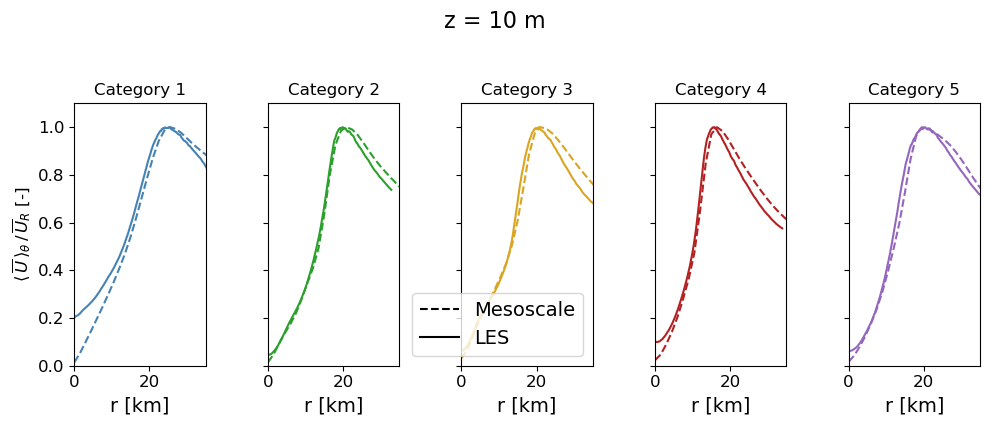

In [15]:
#%% Compare eyewall radius for each domain and each hurricane

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,1.1]
iz = 0

plt.figure(figsize=(10,4))
plt.suptitle(r"z = 10 m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    
    plt.title(r"Category " + labels_cat[isim])

    
    ## Domain d01
    rr = r_d01[isim,:]/1000
    plt.plot(rr,UV_azm_d01[isim,iz,:]/np.nanmax(UV_azm_d01[isim,iz,:]),color=colores[isim],linestyle='--')
    
    ## Domain d02
    rr = r_d02[isim,:]/1000
    plt.plot(rr,UV_azm_d02[isim,iz,:]/np.nanmax(UV_azm_d02[isim,iz,:]),color=colores[isim])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/1000
        plt.plot(rr,UV_azm_d03[isim,iz,:]/np.nanmax(UV_azm_d03[isim,iz,:]),color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/1000
#     plt.plot(rr,UV_azm_d04[isim,iz,:]/np.nanmax(UV_azm_d04[isim,iz,:]),color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/1000
#     plt.plot(rr,UV_azm_d05[isim,iz,:]/np.nanmax(UV_azm_d05[isim,iz,:]),color=cols[4])
    
    ## Labels and limits
    if isim==len(domains):
        plt.plot([-1,-1],[-1,-1],color='black',label='Mesoscale',linestyle='--')
        plt.plot([-1,-1],[-1,-1],color='black',label='LES')
        if use_prec:
            plt.plot([-1,-1],[-1,-1],color=cols[2],label='prec')
#         plt.plot([-1,-1],[-1,-1],color=cols[3],label='d04')
#         plt.plot([-1,-1],[-1,-1],color=cols[4],label='d05')
        plt.legend(loc=4,fontsize=14)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}\,\rangle_{\theta}\,/\,\overline{U}_{R}$ [-]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('r [km]',fontsize=14)
    plt.xlim([0,35])
    
plt.tight_layout()
plt.savefig(dirFig + "R_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/3198175427.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


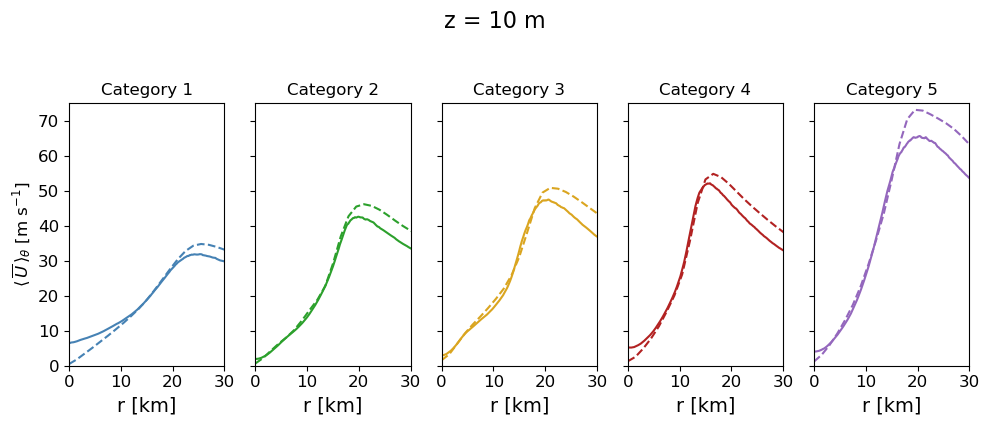

In [16]:
#%% Compare eyewall radius for each domain and each hurricane

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,75]
iz = 0

plt.figure(figsize=(10,4))
plt.suptitle(r"z = 10 m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    
    plt.title(r"Category " + labels_cat[isim])

    
    ## Domain d01
    rr = r_d01[isim,:]/1000
    plt.plot(rr,UV_azm_d01[isim,iz,:],color=colores[isim],linestyle='--')
    
    ## Domain d02
    rr = r_d02[isim,:]/1000
    plt.plot(rr,UV_azm_d02[isim,iz,:],color=colores[isim])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/1000
        plt.plot(rr,UV_azm_d03[isim,iz,:],color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/1000
#     plt.plot(rr,UV_azm_d04[isim,iz,:]/np.nanmax(UV_azm_d04[isim,iz,:]),color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/1000
#     plt.plot(rr,UV_azm_d05[isim,iz,:]/np.nanmax(UV_azm_d05[isim,iz,:]),color=cols[4])
    
    ## Labels and limits
    if isim==len(domains):
        plt.plot([-1,-1],[-1,-1],color='black',label='Mesoscale',linestyle='--')
        plt.plot([-1,-1],[-1,-1],color='black',label='LES')
        if use_prec:
            plt.plot([-1,-1],[-1,-1],color=cols[2],label='prec')
#         plt.plot([-1,-1],[-1,-1],color=cols[3],label='d04')
#         plt.plot([-1,-1],[-1,-1],color=cols[4],label='d05')
        # plt.legend(loc=4,fontsize=14)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('r [km]',fontsize=14)
    plt.xlim([0,30])
    
plt.tight_layout()
plt.savefig(dirFig + "R_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


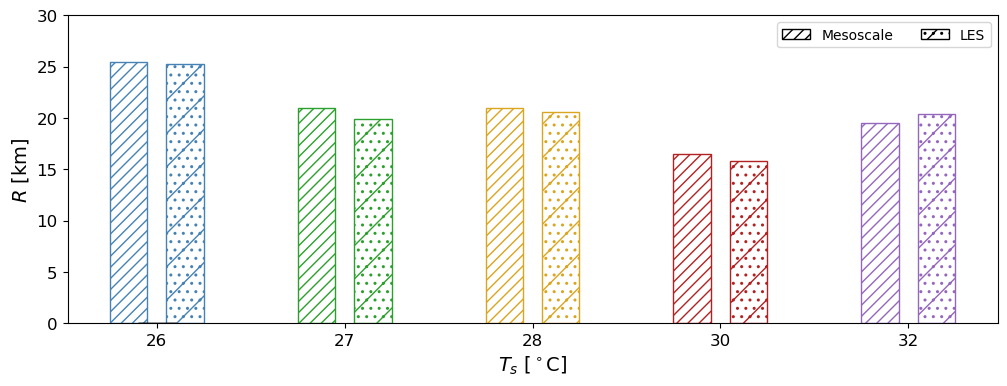

In [17]:
#%% Visualize radius of maximum winds for each simulatio and each domain

sst_labels = ['26','27','28','30','32'] #np.arange(26,30+1,2)
sst = np.arange(numSims)

pm = np.linspace(-0.15,0.15,len(domains))

plt.figure(figsize=(12,4))
for isim in np.arange(numSims):
    ## Domain d01
    plt.bar(sst[isim]+pm[0],R_d01[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="///")
    
    ## Domain d02
    plt.bar(sst[isim]+pm[1],R_d02[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="./.")
    
    if use_prec:
        ## Domain d03
        plt.bar(sst[isim]+pm[2],R_d03[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="...")
    
#     ## Domain d04
#     plt.bar(sst[isim]+pm[3],R_d04[isim]/1000,width=0.2,facecolor='none',edgecolor=cols[isim], hatch="oo")
    
#     ## Domain d05
#     plt.bar(sst[isim]+pm[4],R_d05[isim]/1000,width=0.2,facecolor='none',edgecolor=cols[isim], hatch="---")

## Labels and Limits
plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="///",label='Mesoscale')
plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="./.",label='LES')
if use_prec:
    plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="...",label='prec')
# plt.bar(sst[0],-1*R_d05[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="oo",label='d04')
# plt.bar(sst[0],-1*R_d05[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="---",label='d05')
plt.ylim(0,30)
locs,labs = plt.xticks(fontsize=12)
plt.xticks(sst,sst_labels)
plt.yticks(fontsize=12)
plt.ylabel(r'$R$ [km]',fontsize=14)
plt.xlabel(r'$T_s$ [$^\circ$C]',fontsize=14)
plt.legend(ncol=2)

plt.show()

In [18]:
np.mean(np.stack([R_d02,R_d01]),axis=0)

array([25388.89882088, 20472.23005867, 20805.56365395, 16166.6728878 ,
       19944.45245552])

In [19]:
R_d01

array([25500., 21000., 21000., 16500., 19500.])

In [20]:
R_d02

array([25277.79764175, 19944.46011734, 20611.12730789, 15833.3457756 ,
       20388.90491104])

## Horizontal wind speed

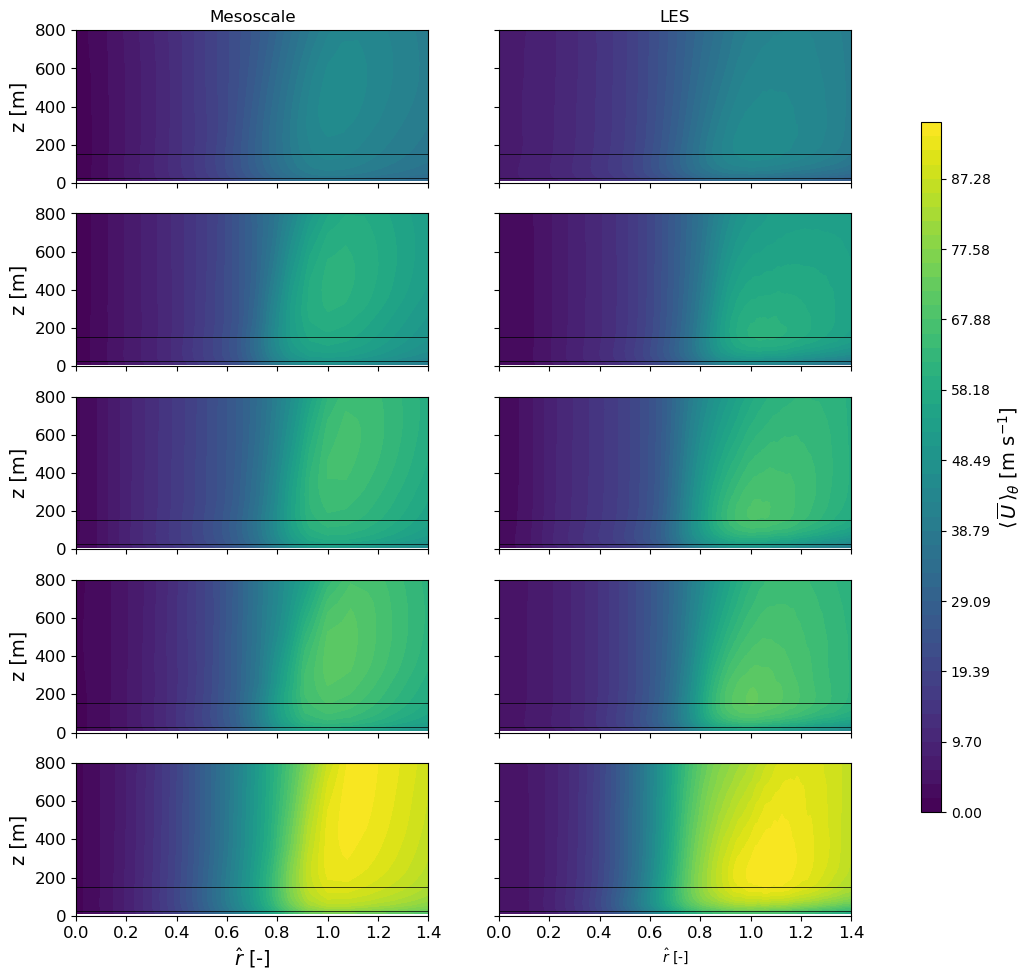

In [21]:
#%% Visualize slice of horizontal wind speed

# Axes limits
xLim = 1.4 #np.nanmin([np.nanmax(r_d01),np.nanmax(r_d02),np.nanmax(r_d03),np.nanmax(r_d04),np.nanmax(r_d05)])/1000
yLim = 800 #np.nanmin([np.nanmin(z_d01[:,-1]),np.nanmin(z_d02[:,-1]),np.nanmin(z_d03[:,-1]),np.nanmin(z_d04[:,-1]),np.nanmin(z_d05[:,-1])])

# Colormap
maxx = np.max([np.nanmax(UV_azm_d01),np.nanmax(UV_azm_d02)])#,
#                np.nanmax(UV_azm_d03),np.nanmax(UV_azm_d04),np.nanmax(UV_azm_d05)])
# minn = np.min([np.nanmin(UV_azm_d01),np.nanmin(UV_azm_d02),
#                np.nanmin(UV_azm_d03),np.nanmin(UV_azm_d04),np.nanmin(UV_azm_d05)])
minn = 0.0
## Figure
fig3 = plt.figure(figsize=(10,11.5),constrained_layout=False)
gs = fig3.add_gridspec(numSims, len(domains))

for isim in np.arange(numSims):
    ## Domain d01
    f3_ax1 = fig3.add_subplot(gs[isim, 0])
    rr = r_d01[isim,:]/R_d01[isim]
    zz = z_d01[isim,:]
    var = UV_azm_d01[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50))#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    plt.ylabel('z [m]',fontsize=14)
    plt.yticks(fontsize=12)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]',fontsize=14)
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('Mesoscale')
    
    ## Domain d02
    f3_ax1 = fig3.add_subplot(gs[isim, 1])
    rr = r_d02[isim,:]/R_d02[isim]
    zz = z_d02[isim,:]
    var = UV_azm_d02[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50))#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    locs,labs = plt.yticks()
    plt.yticks(locs,'')
    plt.ylim(0,yLim)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]')
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('LES')
    
    
    if use_prec:
        ## Domain d03
        f3_ax1 = fig3.add_subplot(gs[isim, 2])
        rr = r_d03[isim,:]/R_d03[isim]
        zz = z_d03[isim,:]
        var = UV_azm_d03[isim,np.logical_not(np.isnan(zz)),:]
        var = var[:,np.logical_not(np.isnan(rr))]
        im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50))#,vmin=minn,vmax=maxx)
        plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
        plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
        plt.xlim(0,xLim)
        plt.ylim(0,yLim)
        locs,labs = plt.yticks()
        plt.yticks(locs,'')
        plt.ylim(0,yLim)
        if isim==numSims-1:
            plt.xlabel(r'$\hat{r}$ [-]',fontsize=14)
        elif isim==0:
            plt.title('prec')
    
caxCB = fig3.add_axes([0.97, 0.2, 0.02, 0.6])
cbarr = fig3.colorbar(im1, cax=caxCB, orientation='vertical',extend='both')
cbarr.set_label(r'$\langle\,\overline{U}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)

plt.savefig(dirFig + "UV_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/775993423.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


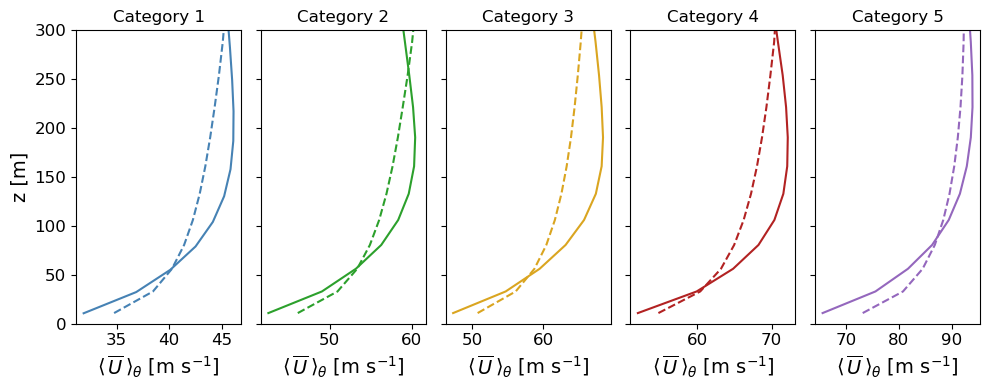

In [51]:
#%% Compare tangential velocity profiles at one radial location
r_norm_loc_arr = [1.01] #np.arange(0.6,1.4+0.1,0.2)

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,300]
plt.figure(figsize=(10,4))
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])

    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Ut_azm_d01[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,UV_azm_d01[isim,iz,:])
        if r_norm_loc==1:
            plt.plot(var,z_d01[isim,:],'--o',color=colores[isim])
        else:
            plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')
        
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Ut_azm_d02[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,UV_azm_d02[isim,iz,:])
        plt.plot(var,z_d02[isim,:],color=colores[isim])

    ## Turbine rotor layer
    plt.plot()
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Ut_azm_d03[isim,:,0])
        for ir in np.arange(len(r_norm_loc_arr)):
            r_norm_loc = r_norm_loc_arr[ir]
            for iz in np.arange(len(z_d03[isim,:])):
                var[iz] = np.interp(r_norm_loc,rr,UV_azm_d03[isim,iz,:])
            plt.plot(var,z_d03[isim,:],color=colores[isim])
    
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{U}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)
    plt.xticks(fontsize=12)
    
plt.tight_layout()
plt.savefig(dirFig + "UV_atR_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2096981/2125911609.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
/tmp/ipykernel_2096981/2125911609.py:89: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\overline{U}$ [m s$^{-1}$]',fontsize=14)


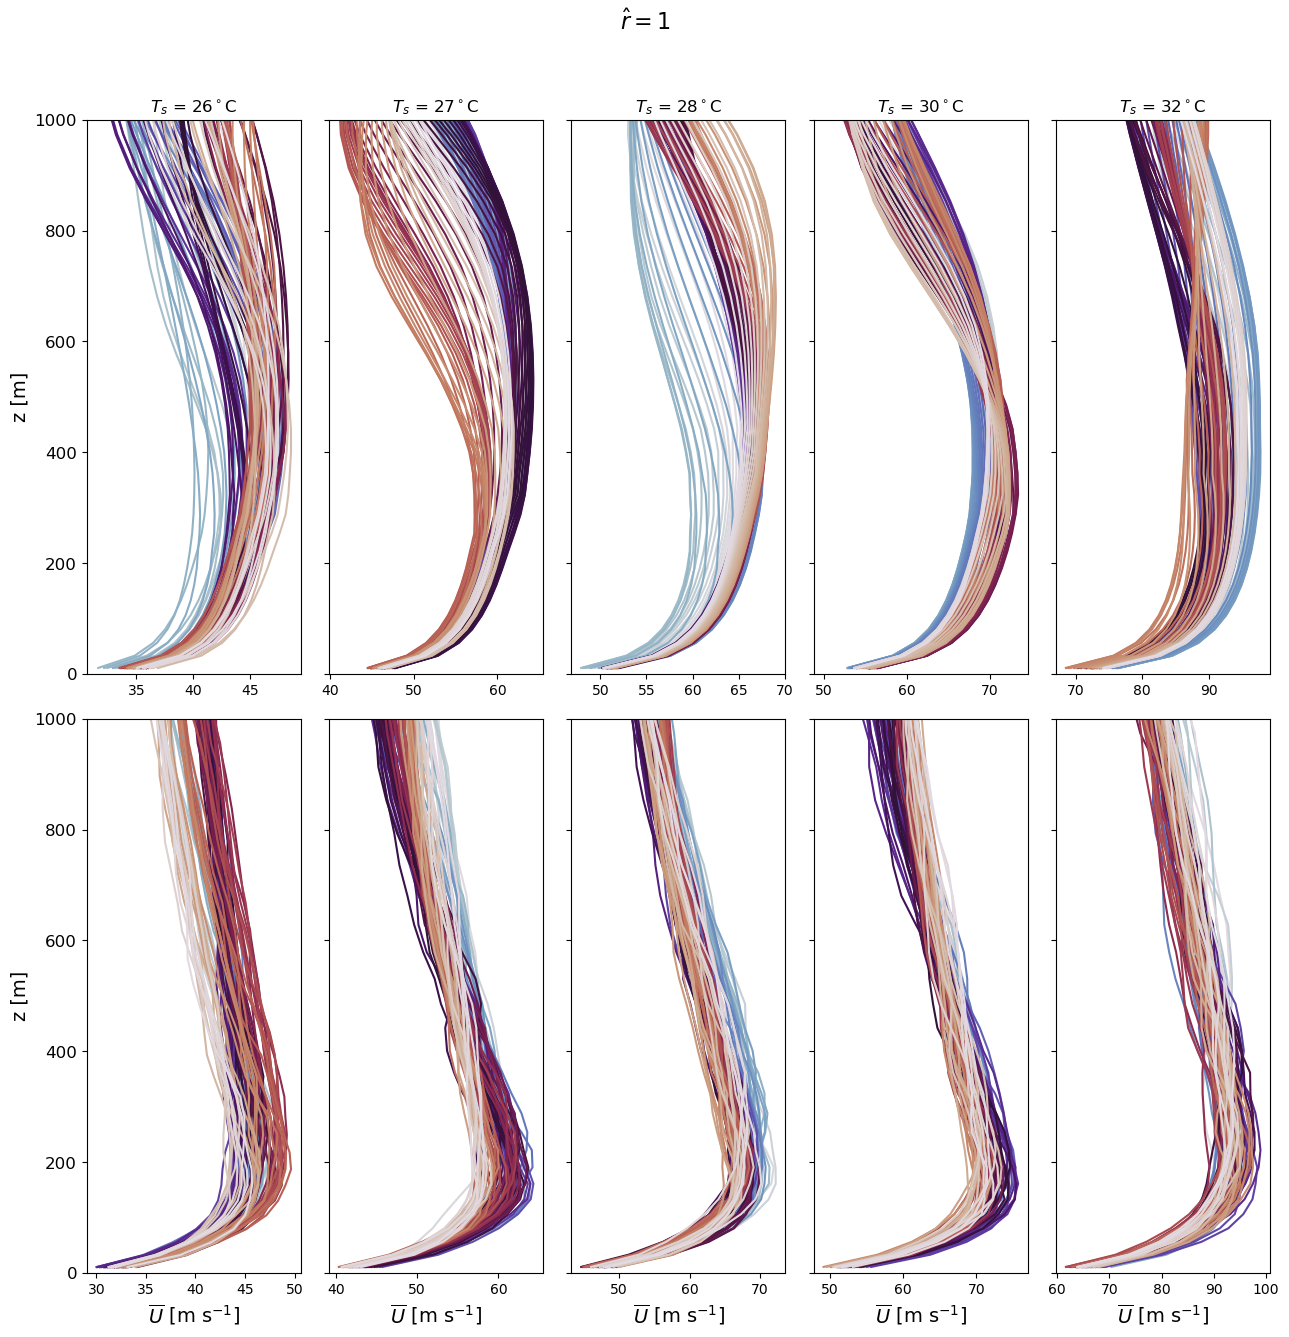

In [23]:
#%% Investigate time-averaged horizontal wind speed for all azimuth angles

r_norm_loc = 1

cols = plt.cm.plasma(np.linspace(0,1,np.shape(UV_d02)[1]))
cols = plt.cm.twilight(np.linspace(0,1,np.shape(UV_d02)[1]))

yLim = 1000

plt.figure(figsize=(13,13))
plt.suptitle(r"$\hat{r} = $" + str(r_norm_loc),fontsize=16,y=1.025)
for isim in np.arange(numSims):
    ## Domain d01
    plt.subplot(len(domains),numSims,isim+1+numSims*0)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    rr = r_d01[isim,:]/R_d01[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(UV_d01)[1]):
        plt.plot(UV_d01[isim,ia,:,ir],z_d01[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    ## Domain d02
    plt.subplot(len(domains),numSims,isim+1+numSims*1)
    rr = r_d02[isim,:]/R_d02[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(UV_d02)[1]):
        plt.plot(UV_d02[isim,ia,:,ir],z_d02[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    if use_prec:
        ## Domain d03
        plt.subplot(len(domains),numSims,isim+1+numSims*2)
        rr = r_d03[isim,:]/R_d03[isim]
        ir = np.nanargmin(np.abs(rr - r_norm_loc))
        for ia in np.arange(np.shape(UV_d03)[1]):
            plt.plot(UV_d03[isim,ia,:,ir],z_d03[isim,:],color=cols[ia])

        plt.ylim(0,yLim)
        locs,labs = plt.yticks(fontsize=12)
        if isim==0:
            plt.ylabel('z [m]',fontsize=14)
        else:
            plt.yticks(locs,'')
        plt.ylim(0,yLim)
    
#     ## Domain d04
#     plt.subplot(len(domains),numSims,isim+1+numSims*3)
#     rr = r_d04[isim,:]/R_d04[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(UV_d04)[1]):
#         plt.plot(UV_d04[isim,ia,:,ir],z_d04[isim,:],color=cols[ia])
        
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks(fontsize=12)
#     if isim==0:
#         plt.ylabel('z [m]',fontsize=14)
#     else:
#         plt.yticks(locs,'')
#     plt.ylim(0,yLim)
    
#     ## Domain d05
#     plt.subplot(len(domains),numSims,isim+1+numSims*4)
#     rr = r_d05[isim,:]/R_d05[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(UV_d05)[1]):
#         plt.plot(UV_d05[isim,ia,:,ir],z_d05[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    plt.xlabel('$\overline{U}$ [m s$^{-1}$]',fontsize=14)
plt.tight_layout()
plt.show()

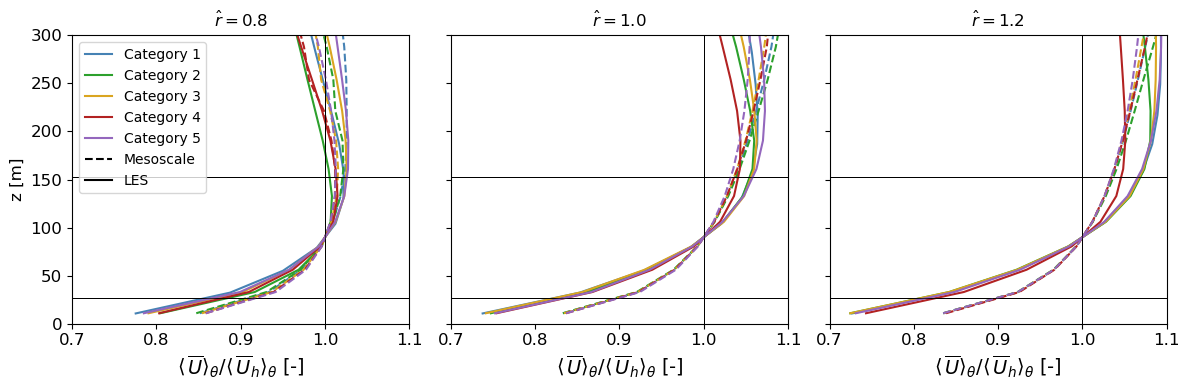

In [24]:
#%% Wind direction profiles (zero at hub height)

#%% Compare radial velocity profiles at various radial location
r_norm_loc = [0.8,1.0,1.2]

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,300]
xLim = [0.7,1.1]

plt.figure(figsize=(12,4))
for irir in np.arange(len(r_norm_loc)):
    for isim in np.arange(numSims):
        plt.subplot(1,len(r_norm_loc),irir + 1)
        if isim==0:
            plt.title(r"$\hat{r} = $" + str(r_norm_loc[irir]))
        ## Domain d01
        rr = r_d01[isim,:]/R_d01[isim]
        var = np.zeros_like(Un_azm_d01[isim,:,0])
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc[irir],rr,UV_azm_d01[isim,iz,:])
        var = var/np.interp(z_hh,z_d01[isim,:],var)
        plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')

        ## Domain d02
        rr = r_d02[isim,:]/R_d02[isim]
        var = np.zeros_like(Un_azm_d02[isim,:,0])
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc[irir],rr,UV_azm_d02[isim,iz,:])
        var = var/np.interp(z_hh,z_d02[isim,:],var)
        plt.plot(var,z_d02[isim,:],color=colores[isim],linestyle='-',label="Category " + labels_cat[isim])
        
        ## Rotor layer
        plt.plot([1,1],yLim,'-k',linewidth=0.5)
        plt.plot(xLim,[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
        plt.plot(xLim,[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
        
        ## Labels and limits
        if (isim==numSims-1) & (irir==0):
            plt.plot(np.array([0,0]),[-1,-1],color='black',label='Mesoscale',linestyle='--')
            plt.plot(np.array([0,0]),[-1,-1],color='black',label='LES')
            plt.legend(loc=2)
        plt.ylim(yLim)
        plt.xlim(xLim)
        if irir==0:
            plt.ylabel('z [m]',fontsize=12)
            locs,labs = plt.yticks(fontsize=12)
        else:
            plt.yticks(locs,'')
        plt.ylim(yLim)
        plt.xlabel(r'$\langle\,\overline{U}\rangle_{\theta}/\langle\,\overline{U}_h\rangle_{\theta}$ [-]',fontsize=14)
        plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig(dirFig + "UVChange.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()



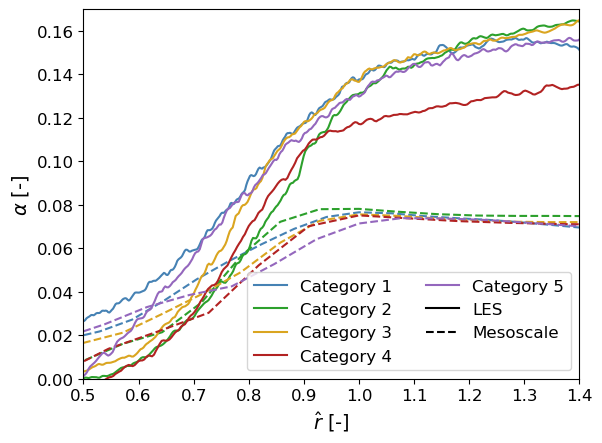

In [25]:
#%% Fit wind profiles to power-law
from scipy.optimize import curve_fit

def powLaw(z_z,alpha):
    u_o = u_curr;
    UUU = u_o*((z_z/z_hh)**alpha)
    return UUU


z_hh = 90
D_turb = 126

## Domain d01
alpha_d01 = np.zeros_like(UV_azm_d01[:,0,:])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_d01[isim,:])):
        if np.logical_not(np.isnan(r_d01[isim,ir])):
            u_curr = np.interp(z_hh,z_d01[isim,:-2],UV_azm_d01[isim,:-2,ir])
            i_zzz_RL = np.where((z_d01[isim,:-2]>z_hh-0.55*D_turb) & (z_d01[isim,:-2]<z_hh+0.6*D_turb))[0]
            popt, pcov = curve_fit(powLaw, z_d01[isim,i_zzz_RL], UV_azm_d01[isim,i_zzz_RL,ir])
            alpha_d01[isim,ir] = popt[0]

## Domain d02
alpha_d02 = np.zeros_like(UV_azm_d02[:,0,:])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_d02[isim,:])):
        if np.logical_not(np.isnan(r_d02[isim,ir])):
            u_curr = np.interp(z_hh,z_d02[isim,:-2],UV_azm_d02[isim,:-2,ir])
            i_zzz_RL = np.where((z_d02[isim,:-2]>z_hh-0.55*D_turb) & (z_d02[isim,:-2]<z_hh+0.6*D_turb))[0]
            popt, pcov = curve_fit(powLaw, z_d02[isim,i_zzz_RL], UV_azm_d02[isim,i_zzz_RL,ir])
            alpha_d02[isim,ir] = popt[0]
            
plt.figure()
for isim in np.arange(numSims):
    plt.plot(r_d02[isim,:]/R_d02[isim],alpha_d02[isim,:],color=colores[isim],linestyle='-',label="Category " + labels_cat[isim])
    plt.plot(r_d01[isim,:]/R_d01[isim],alpha_d01[isim,:],color=colores[isim],linestyle='--')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='-',label='LES')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='--',label='Mesoscale')
plt.xlim(0.5,1.4)
plt.ylim(0,0.17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$\hat{r}$ [-]",fontsize=14)
plt.ylabel(r"$\alpha$ [-]",fontsize=14)
plt.legend(fontsize=12,ncol=2)
plt.savefig(dirFig + "alpha.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()
plt.close()


In [26]:
alpha_mean = np.zeros(numSims)
for isim in np.arange(numSims):
    alpha_mean[isim] = np.mean(alpha_d02[isim,r_d02[isim,:]/R_d02[isim]>1])
print(np.mean(alpha_mean))

    

0.15263394684688916


In [27]:
R_d02

array([25277.79764175, 19944.46011734, 20611.12730789, 15833.3457756 ,
       20388.90491104])

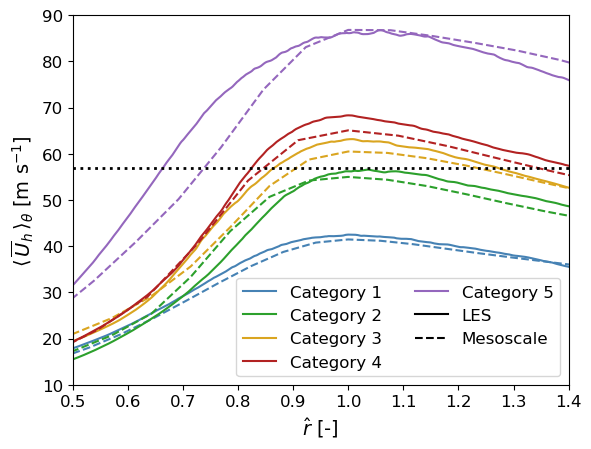

In [28]:
#%% Hub-height wind speed
plt.figure()
for isim in np.arange(numSims):
    iHH = np.argmin(np.abs(z_d01[isim,:10] - z_hh)) # z_hh
    plt.plot(r_d02[isim,:]/R_d02[isim],UV_azm_d02[isim,iHH,:],color=colores[isim],linestyle='-',label="Category " + labels_cat[isim])
    plt.plot(r_d01[isim,:]/R_d01[isim],UV_azm_d01[isim,iHH,:],color=colores[isim],linestyle='--')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='-',label='LES')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='--',label='Mesoscale')
plt.plot([0,3],[57,57],':k',linewidth=2)
plt.xlim(0.5,1.4)
plt.ylim(10,90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$\hat{r}$ [-]",fontsize=14)
plt.ylabel(r"$\langle\,\overline{U}_h\,\rangle_{\theta}$ [m s$^{-1}$]",fontsize=14)
plt.legend(fontsize=12,ncol=2)
plt.savefig(dirFig + "UV_hh.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()
plt.close()


## Tangential velocity

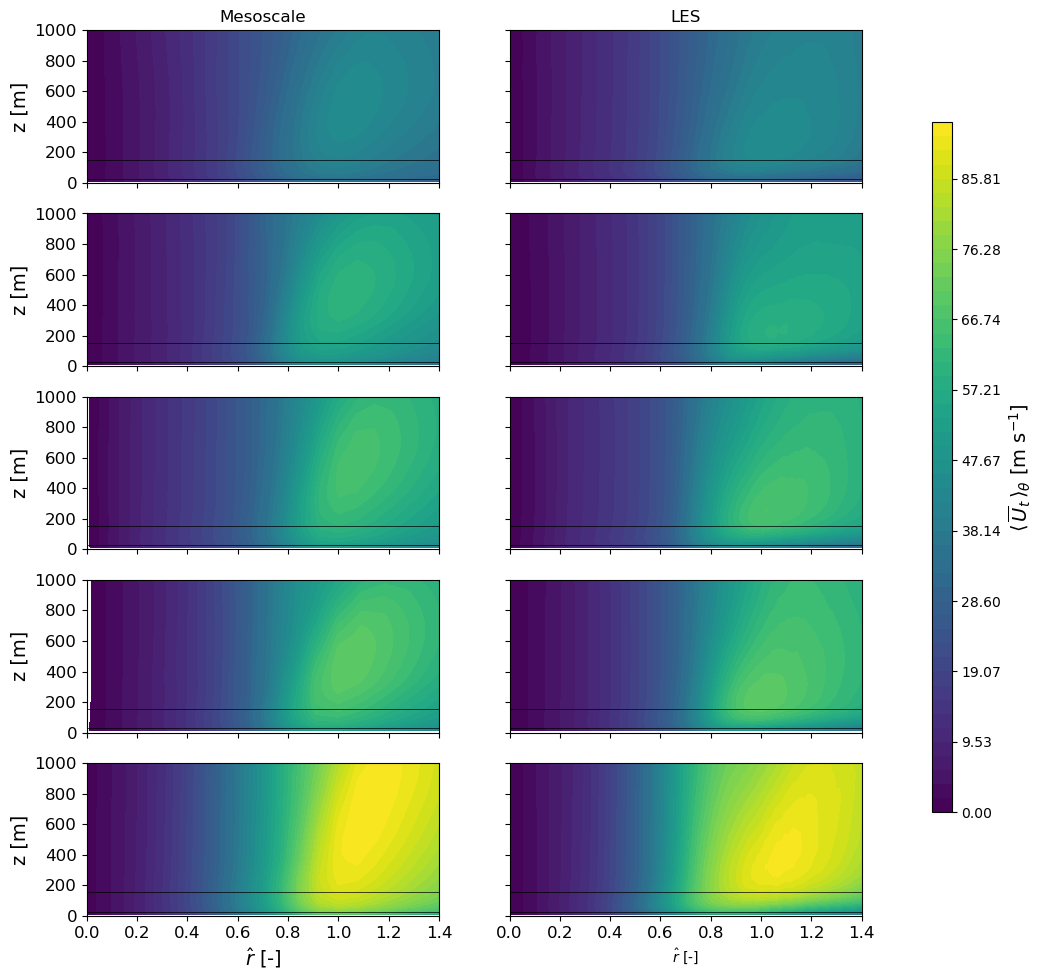

In [29]:
#%% Visualize slice of tangential velocity

# Axes limits
xLim = 1.4 #np.nanmin([np.nanmax(r_d01),np.nanmax(r_d02),np.nanmax(r_d03),np.nanmax(r_d04),np.nanmax(r_d05)])/1000
yLim = 1000 #np.nanmin([np.nanmin(z_d01[:,-1]),np.nanmin(z_d02[:,-1]),np.nanmin(z_d03[:,-1]),np.nanmin(z_d04[:,-1]),np.nanmin(z_d05[:,-1])])

# Colormap
maxx = np.max([np.nanmax(Ut_azm_d01),np.nanmax(Ut_azm_d02)]) #,
#                np.nanmax(Ut_azm_d03),np.nanmax(Ut_azm_d04),np.nanmax(Ut_azm_d05)])
# minn = np.min([np.nanmin(Ut_azm_d01),np.nanmin(Ut_azm_d02),
#                np.nanmin(Ut_azm_d03),np.nanmin(Ut_azm_d04),np.nanmin(Ut_azm_d05)])
minn = 0.0
## Figure
fig3 = plt.figure(figsize=(10,11.5),constrained_layout=False)
gs = fig3.add_gridspec(numSims, len(domains))

for isim in np.arange(numSims):
    ## Domain d01
    f3_ax1 = fig3.add_subplot(gs[isim, 0])
    rr = r_d01[isim,:]/R_d01[isim]
    zz = z_d01[isim,:]
    var = Ut_azm_d01[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50))#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    plt.ylabel('z [m]',fontsize=14)
    plt.yticks(fontsize=12)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]',fontsize=14)
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('Mesoscale')
    
    ## Domain d02
    f3_ax1 = fig3.add_subplot(gs[isim, 1])
    rr = r_d02[isim,:]/R_d02[isim]
    zz = z_d02[isim,:]
    var = Ut_azm_d02[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50))#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    locs,labs = plt.yticks()
    plt.yticks(locs,'')
    plt.ylim(0,yLim)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]')
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('LES')
        
## Colorbar
# caxCB = fig3.add_axes([0.2, 1.05, 0.6, 0.02])
# cbarr = fig3.colorbar(im1, cax=caxCB, orientation='horizontal',extend='both')
# cbarr.set_label(r'$\overline{U}$ [m s$^{-1}$]',fontsize=14,labelpad=-60)

caxCB = fig3.add_axes([0.97, 0.2, 0.02, 0.6])
cbarr = fig3.colorbar(im1, cax=caxCB, orientation='vertical',extend='both')
cbarr.set_label(r'$\langle\,\overline{U}_t\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)

plt.savefig(dirFig + "Ut_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')



<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/3070133120.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


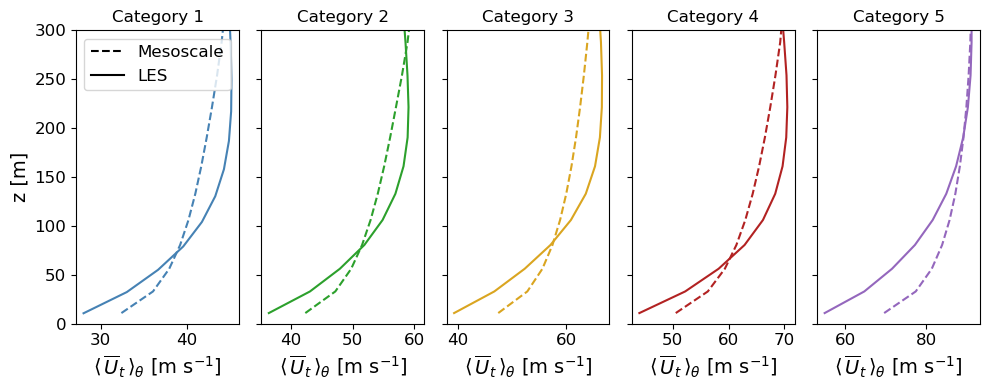

In [49]:
#%% Compare tangential velocity profiles at one radial location
r_norm_loc_arr = [1.01] #np.arange(0.6,1.4+0.1,0.2)

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,1000]
plt.figure(figsize=(10,4))
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])

    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Ut_azm_d01[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,Ut_azm_d01[isim,iz,:])
        if r_norm_loc==1:
            plt.plot(var,z_d01[isim,:],'--o',color=colores[isim])
        else:
            plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')
    # For labels
    if isim==0:
        plt.plot(var,-1*z_d01[isim,:],color='black',linestyle='--',label='Mesoscale')
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Ut_azm_d02[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,Ut_azm_d02[isim,iz,:])
        plt.plot(var,z_d02[isim,:],color=colores[isim])
    if isim==0:
        plt.plot(var,-1*z_d02[isim,:],color='black',linestyle='-',label='LES')
        plt.legend(fontsize=12)
        
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Ut_azm_d03[isim,:,0])
        for ir in np.arange(len(r_norm_loc_arr)):
            r_norm_loc = r_norm_loc_arr[ir]
            for iz in np.arange(len(z_d03[isim,:])):
                var[iz] = np.interp(r_norm_loc,rr,Ut_azm_d03[isim,iz,:])
            plt.plot(var,z_d03[isim,:],color=colores[isim])
    
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{U}_t\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)
    plt.xticks(fontsize=12)
    
plt.tight_layout()
plt.savefig(dirFig + "Ut_atR_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/3377445214.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


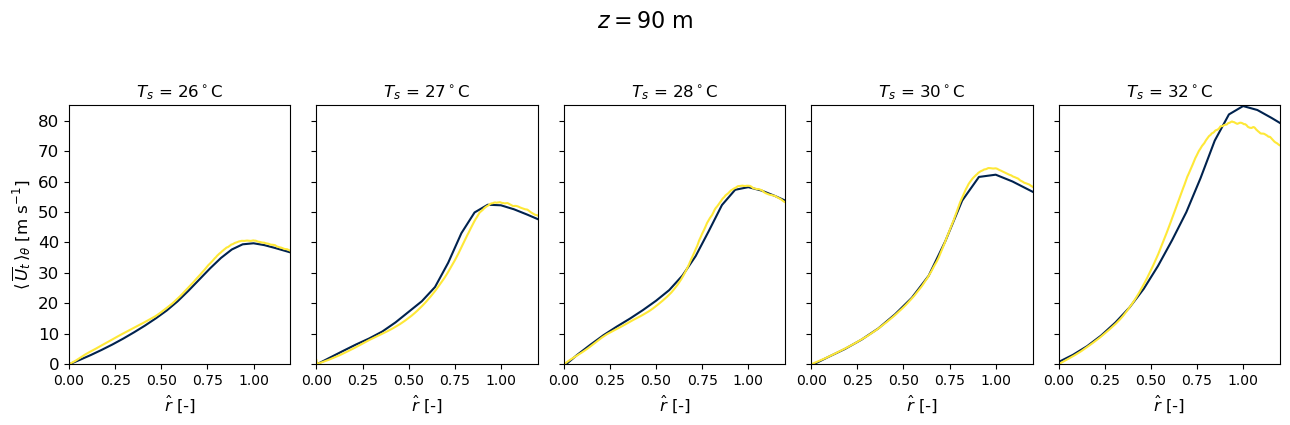

In [31]:
#%% Radial distribution of tangential velocity at one height

zzz = 90

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,85]
xLim = [0,1.2]

plt.figure(figsize=(13,4))
plt.suptitle(r"$z = $" + str(zzz) + " m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Ut_azm_d01[isim,0,:])
    for ir in np.arange(len(r_d01[isim,:])):
        var[ir] = np.interp(zzz,z_d01[isim,:],Ut_azm_d01[isim,:,ir])
    plt.plot(r_d01[isim,:]/R_d01[isim],var,color=cols[0])
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Ut_azm_d02[isim,0,:])
    for ir in np.arange(len(r_d02[isim,:])):
        var[ir] = np.interp(zzz,z_d02[isim,:],Ut_azm_d02[isim,:,ir])
    plt.plot(r_d02[isim,:]/R_d02[isim],var,color=cols[1])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Ut_azm_d03[isim,0,:])
        for ir in np.arange(len(r_d03[isim,:])):
            var[ir] = np.interp(zzz,z_d03[isim,:],Ut_azm_d03[isim,:,ir])
        plt.plot(r_d03[isim,:]/R_d03[isim],var,color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/R_d04[isim]
#     var = np.zeros_like(Ut_azm_d04[isim,0,:])
#     for ir in np.arange(len(r_d04[isim,:])):
#         var[ir] = np.interp(zzz,z_d04[isim,:],Ut_azm_d04[isim,:,ir])
#     plt.plot(r_d04[isim,:]/R_d04[isim],var,color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/R_d05[isim]
#     var = np.zeros_like(Ut_azm_d05[isim,0,:])
#     for ir in np.arange(len(r_d05[isim,:])):
#         var[ir] = np.interp(zzz,z_d05[isim,:],Ut_azm_d05[isim,:,ir])
#     plt.plot(r_d05[isim,:]/R_d05[isim],var,color=cols[4])
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}_t\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlim(xLim)
    plt.xlabel(r'$\hat{r}$ [-]',fontsize=12)
    
plt.tight_layout()
plt.show()


## Radial velocity

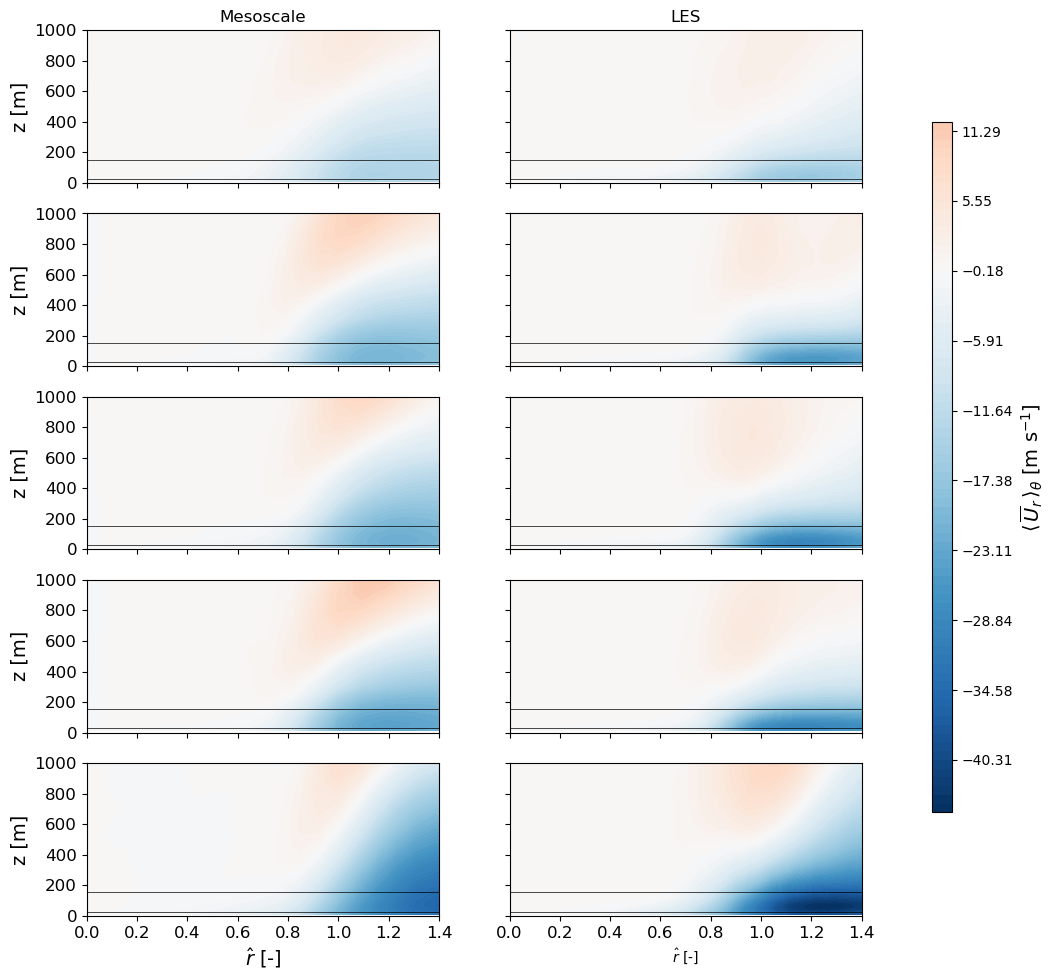

In [32]:
#%% Visualize slice of radial velocity

# Axes limits
xLim = 1.4 #np.nanmin([np.nanmax(r_d01),np.nanmax(r_d02),np.nanmax(r_d03),np.nanmax(r_d04),np.nanmax(r_d05)])/1000
yLim = 1000 #np.nanmin([np.nanmin(z_d01[:,-1]),np.nanmin(z_d02[:,-1]),np.nanmin(z_d03[:,-1]),np.nanmin(z_d04[:,-1]),np.nanmin(z_d05[:,-1])])

# Colormap
maxx = np.max([np.nanmax(Un_azm_d01),np.nanmax(Un_azm_d02)])#,
#                np.nanmax(Un_azm_d03),np.nanmax(Un_azm_d04),np.nanmax(Un_azm_d05)])
minn = np.min([np.nanmin(Un_azm_d01),np.nanmin(Un_azm_d02)])#,
#                np.nanmin(Un_azm_d03),np.nanmin(Un_azm_d04),np.nanmin(Un_azm_d05)])
newCmap = cmocean.tools.crop(plt.cm.RdBu_r, 0.9996*minn, 1.0004*maxx, 0)
numLev = 80

## Figure
fig3 = plt.figure(figsize=(10,11.5),constrained_layout=False)
gs = fig3.add_gridspec(numSims, len(domains))

for isim in np.arange(numSims):
    ## Domain d01
    f3_ax1 = fig3.add_subplot(gs[isim, 0])
    rr = r_d01[isim,:]/R_d01[isim]
    zz = z_d01[isim,:]
    var = Un_azm_d01[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,numLev),cmap=newCmap)#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    plt.ylabel('z [m]',fontsize=14)
    plt.yticks(fontsize=12)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]',fontsize=14)
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('Mesoscale')
    
    ## Domain d02
    f3_ax1 = fig3.add_subplot(gs[isim, 1])
    rr = r_d02[isim,:]/R_d02[isim]
    zz = z_d02[isim,:]
    var = Un_azm_d02[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,numLev),cmap=newCmap)#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    locs,labs = plt.yticks()
    plt.yticks(locs,'')
    plt.ylim(0,yLim)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]')
        plt.xticks(fontsize=12)
    else:
        locs,labs = plt.xticks()
        plt.xticks(locs,'')
    if isim==0:
        plt.title('LES')
    
    if use_prec:
        ## Domain d03
        f3_ax1 = fig3.add_subplot(gs[isim, 2])
        rr = r_d03[isim,:]/R_d03[isim]
        zz = z_d03[isim,:]
        var = Un_azm_d03[isim,np.logical_not(np.isnan(zz)),:]
        var = var[:,np.logical_not(np.isnan(rr))]
        im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,numLev),cmap=newCmap)#,vmin=minn,vmax=maxx)
        plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
        plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
        plt.xlim(0,xLim)
        plt.ylim(0,yLim)
        locs,labs = plt.yticks()
        plt.yticks(locs,'')
        plt.ylim(0,yLim)
        if isim==numSims-1:
            plt.xlabel(r'$\hat{r}$ [-]')
        elif isim==0:
            plt.title('prec')
        
## Colorbar
# caxCB = fig3.add_axes([0.2, 1.05, 0.6, 0.02])
# cbarr = fig3.colorbar(im1, cax=caxCB, orientation='horizontal',extend='both')
# cbarr.set_label(r'$\overline{U}$ [m s$^{-1}$]',fontsize=14,labelpad=-60)

caxCB = fig3.add_axes([0.97, 0.2, 0.02, 0.6])
cbarr = fig3.colorbar(im1, cax=caxCB, orientation='vertical',extend='both')
cbarr.set_label(r'$\langle\,\overline{U}_r\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)

plt.savefig(dirFig + "Ur_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2096981/2545155061.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
/tmp/ipykernel_2096981/2545155061.py:89: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\overline{U}_r$ [m s$^{-1}$]',fontsize=14)


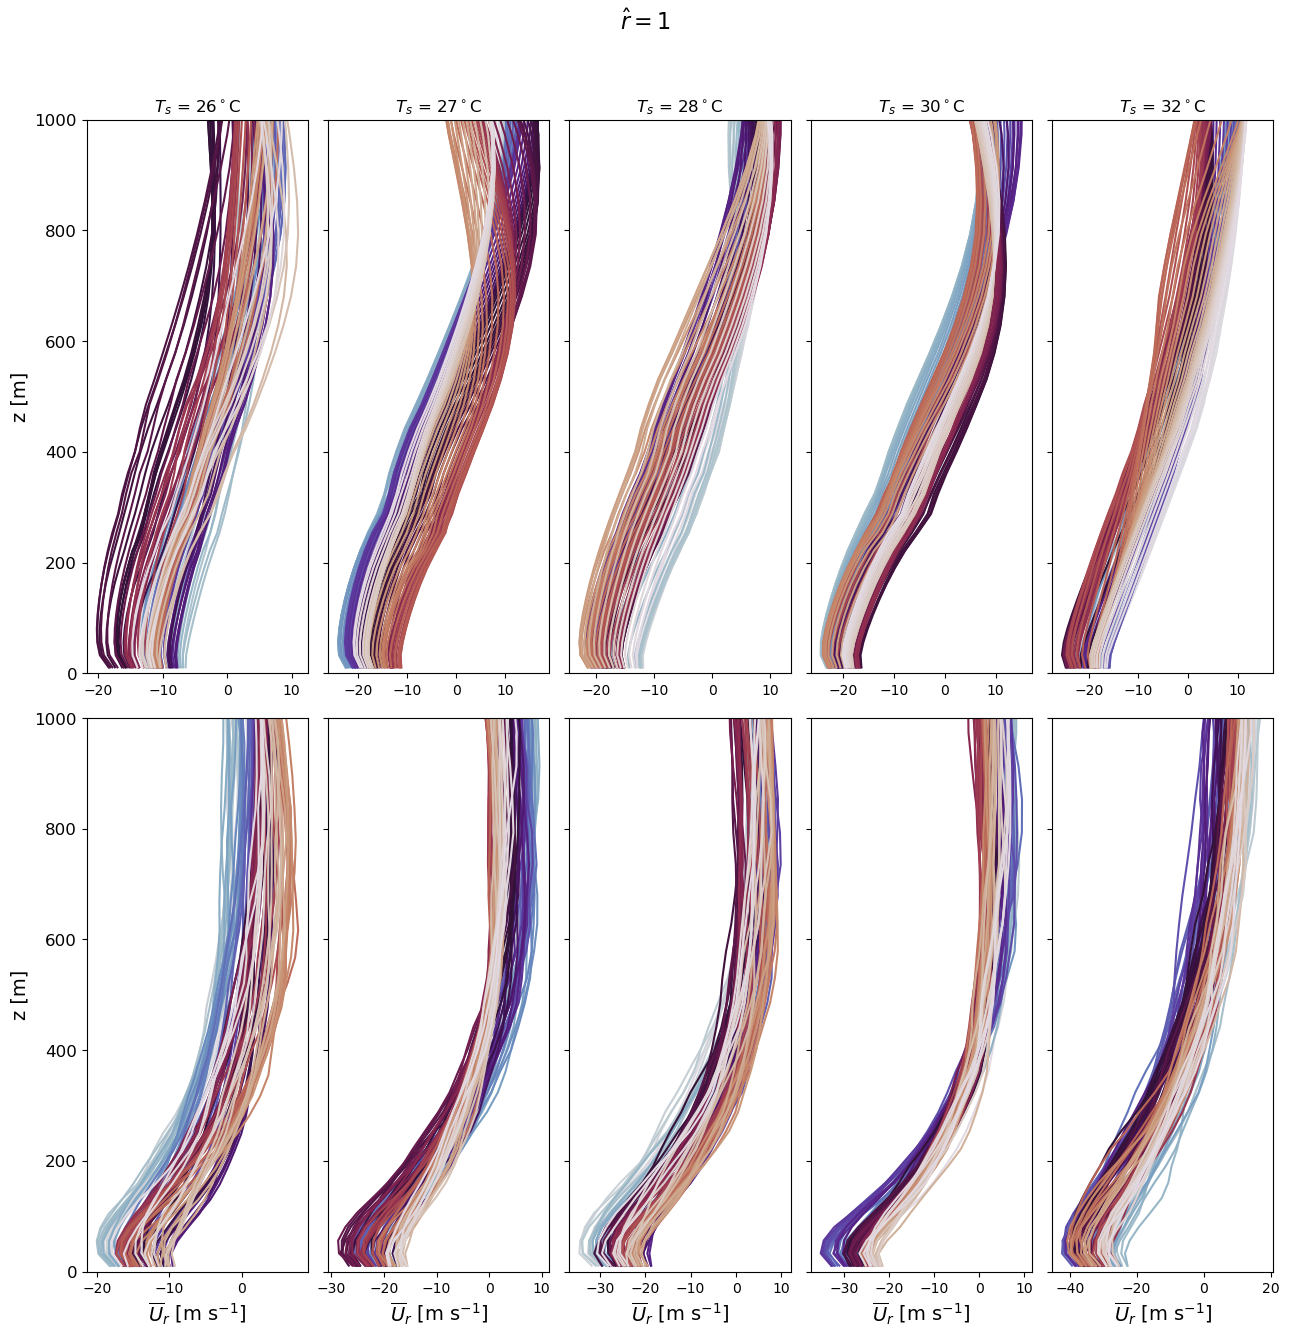

In [33]:
#%% Investigate time-averaged radial wind speed for all azimuth angles

r_norm_loc = 1

cols = plt.cm.plasma(np.linspace(0,1,np.shape(Un_d02)[1]))
cols = plt.cm.twilight(np.linspace(0,1,np.shape(Un_d02)[1]))

yLim = 1000

plt.figure(figsize=(13,13))
plt.suptitle(r"$\hat{r} = $" + str(r_norm_loc),fontsize=16,y=1.025)
for isim in np.arange(numSims):
    ## Domain d01
    plt.subplot(len(domains),numSims,isim+1+numSims*0)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    rr = r_d01[isim,:]/R_d01[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(Un_d01)[1]):
        plt.plot(Un_d01[isim,ia,:,ir],z_d01[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    ## Domain d02
    plt.subplot(len(domains),numSims,isim+1+numSims*1)
    rr = r_d02[isim,:]/R_d02[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(Un_d02)[1]):
        plt.plot(Un_d02[isim,ia,:,ir],z_d02[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    if use_prec:
        ## Domain d03
        plt.subplot(len(domains),numSims,isim+1+numSims*2)
        rr = r_d03[isim,:]/R_d03[isim]
        ir = np.nanargmin(np.abs(rr - r_norm_loc))
        for ia in np.arange(np.shape(Un_d03)[1]):
            plt.plot(Un_d03[isim,ia,:,ir],z_d03[isim,:],color=cols[ia])

        plt.ylim(0,yLim)
        locs,labs = plt.yticks(fontsize=12)
        if isim==0:
            plt.ylabel('z [m]',fontsize=14)
        else:
            plt.yticks(locs,'')
        plt.ylim(0,yLim)
    
#     ## Domain d04
#     plt.subplot(len(domains),numSims,isim+1+numSims*3)
#     rr = r_d04[isim,:]/R_d04[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(Un_d04)[1]):
#         plt.plot(Un_d04[isim,ia,:,ir],z_d04[isim,:],color=cols[ia])
        
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks(fontsize=12)
#     if isim==0:
#         plt.ylabel('z [m]',fontsize=14)
#     else:
#         plt.yticks(locs,'')
#     plt.ylim(0,yLim)
    
#     ## Domain d05
#     plt.subplot(len(domains),numSims,isim+1+numSims*4)
#     rr = r_d05[isim,:]/R_d05[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(Un_d05)[1]):
#         plt.plot(Un_d05[isim,ia,:,ir],z_d05[isim,:],color=cols[ia])
        
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks(fontsize=12)
#     if isim==0:
#         plt.ylabel('z [m]',fontsize=14)
#     else:
#         plt.yticks(locs,'')
    plt.ylim(0,yLim)
    plt.xlabel('$\overline{U}_r$ [m s$^{-1}$]',fontsize=14)
plt.tight_layout()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/2835531622.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


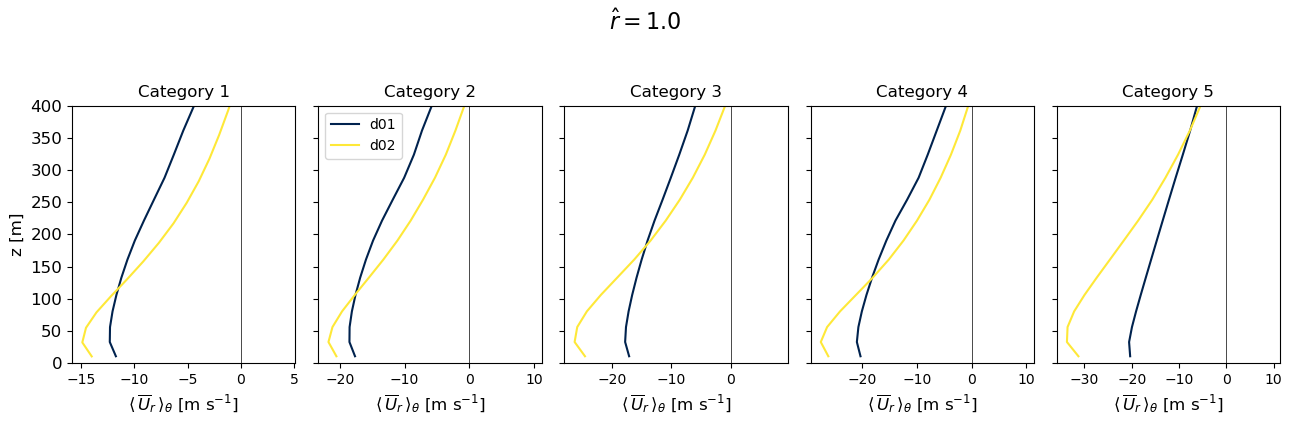

In [34]:
#%% Compare radial velocity profiles at one radial location
r_norm_loc = 1.0

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,400]
plt.figure(figsize=(13,4))
plt.suptitle(r"$\hat{r} = $" + str(r_norm_loc),fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Un_azm_d01[isim,:,0])
    for iz in np.arange(len(z_d01[isim,:])):
        var[iz] = np.interp(r_norm_loc,rr,Un_azm_d01[isim,iz,:])
    plt.plot(var,z_d01[isim,:],color=cols[0])
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Un_azm_d02[isim,:,0])
    for iz in np.arange(len(z_d02[isim,:])):
        var[iz] = np.interp(r_norm_loc,rr,Un_azm_d02[isim,iz,:])
    plt.plot(var,z_d02[isim,:],color=cols[1])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Un_azm_d03[isim,:,0])
        for iz in np.arange(len(z_d03[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,Un_azm_d03[isim,iz,:])
        plt.plot(var,z_d03[isim,:],color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/R_d04[isim]
#     var = np.zeros_like(Un_azm_d04[isim,:,0])
#     for iz in np.arange(len(z_d04[isim,:])):
#         var[iz] = np.interp(r_norm_loc,rr,Un_azm_d04[isim,iz,:])
#     plt.plot(var,z_d04[isim,:],color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/R_d05[isim]
#     var = np.zeros_like(Un_azm_d05[isim,:,0])
#     for iz in np.arange(len(z_d05[isim,:])):
#         var[iz] = np.interp(r_norm_loc,rr,Un_azm_d05[isim,iz,:])
#     plt.plot(var,z_d05[isim,:],color=cols[4])
    
    ## Labels and limits
    if isim==len(domains)-1:
        plt.plot([0,0],[-1,-1],color=cols[0],label='d01')
        plt.plot([0,0],[-1,-1],color=cols[1],label='d02')
#         plt.plot([0,0],[-1,-1],color=cols[2],label='d03')
#         plt.plot([0,0],[-1,-1],color=cols[3],label='d04')
#         plt.plot([0,0],[-1,-1],color=cols[4],label='d05')
        plt.legend(loc=2)
    plt.plot([0,0],yLim,'-k',linewidth=0.5)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{U}_r\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
    
plt.tight_layout()
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/2369071491.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


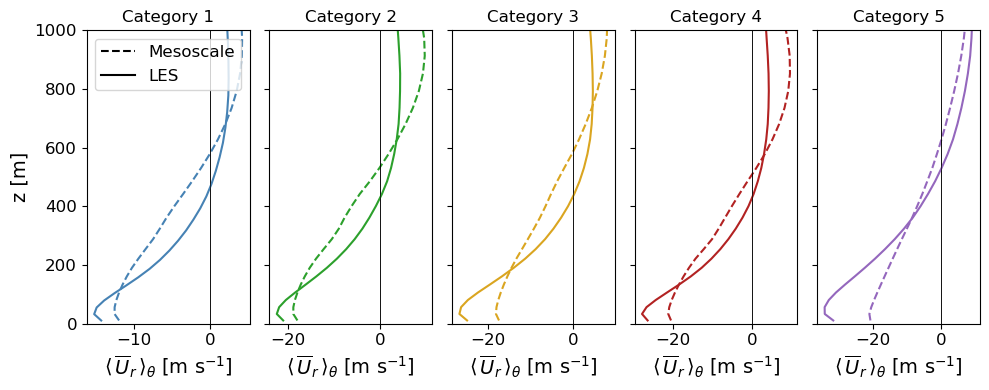

In [35]:
#%% Compare radial velocity profiles at one radial location
r_norm_loc_arr = [1.01] #np.arange(0.6,1.4+0.1,0.2)

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,1000]
plt.figure(figsize=(10,4))
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Ut_azm_d01[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,Un_azm_d01[isim,iz,:])
        if r_norm_loc==1:
            plt.plot(var,z_d01[isim,:],'--o',color=colores[isim])
        else:
            plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')
    # For labels
    if isim==0:
        plt.plot(var,-1*z_d01[isim,:],color='black',linestyle='--',label='Mesoscale')
    plt.plot([0,0],yLim,'-k',linewidth=0.5)
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Ut_azm_d02[isim,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,Un_azm_d02[isim,iz,:])
        plt.plot(var,z_d02[isim,:],color=colores[isim])
    if isim==0:
        plt.plot(var,-1*z_d02[isim,:],color='black',linestyle='-',label='LES')
        plt.legend(fontsize=12)
    plt.plot([0,0],yLim,'-k',linewidth=0.5)
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Ut_azm_d03[isim,:,0])
        for ir in np.arange(len(r_norm_loc_arr)):
            r_norm_loc = r_norm_loc_arr[ir]
            for iz in np.arange(len(z_d03[isim,:])):
                var[iz] = np.interp(r_norm_loc,rr,Un_azm_d03[isim,iz,:])
            plt.plot(var,z_d03[isim,:],color=colores[isim])
    
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{U}_r\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)
    plt.xticks(fontsize=12)
    
plt.tight_layout()
plt.savefig(dirFig + "Ur_atR_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


[35.76489258 37.51904297 39.35705566 41.28314209 43.30133057]


Text(0.5, 0, 'z [m]')

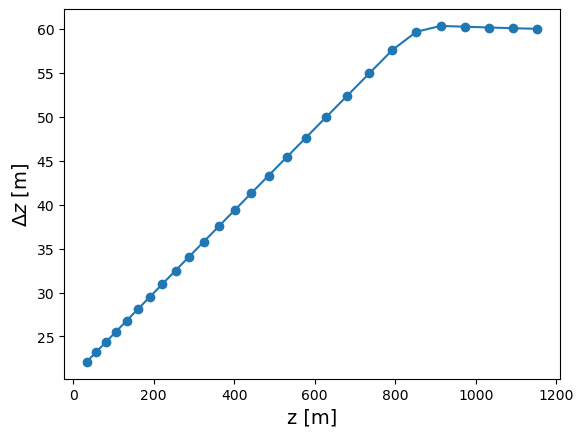

In [36]:
dz = z_d02[-1,1:] - z_d02[-1,0:-1]
print(dz[(z_d01[-1,1:]>300) & (z_d01[-1,1:]<500)])

plt.plot(z_d02[-1,1:],dz,'-o')
# plt.xlim(0,500)
# plt.ylim(0,50)
plt.ylabel(r"$\Delta z$ [m]",fontsize=14)
plt.xlabel('z [m]',fontsize=14)

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/43687476.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


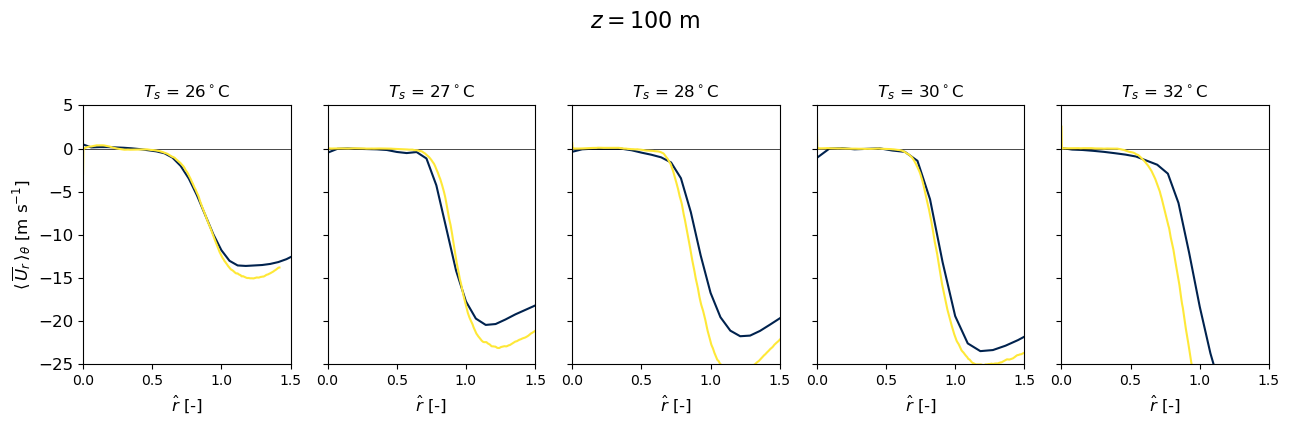

In [37]:
#%% Radial distribution of radial velocity at one height

zzz = 100

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [-25,5]
xLim = [0,1.5]

plt.figure(figsize=(13,4))
plt.suptitle(r"$z = $" + str(zzz) + " m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(Un_azm_d01[isim,0,:])
    for ir in np.arange(len(r_d01[isim,:])):
        var[ir] = np.interp(zzz,z_d01[isim,:],Un_azm_d01[isim,:,ir])
    plt.plot(r_d01[isim,:]/R_d01[isim],var,color=cols[0])
    plt.plot(r_d01[isim,:],0*r_d01[isim,:],'-k',linewidth=0.5)
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(Un_azm_d02[isim,0,:])
    for ir in np.arange(len(r_d02[isim,:])):
        var[ir] = np.interp(zzz,z_d02[isim,:],Un_azm_d02[isim,:,ir])
    plt.plot(r_d02[isim,:]/R_d02[isim],var,color=cols[1])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(Un_azm_d03[isim,0,:])
        for ir in np.arange(len(r_d03[isim,:])):
            var[ir] = np.interp(zzz,z_d03[isim,:],Un_azm_d03[isim,:,ir])
        plt.plot(r_d03[isim,:]/R_d03[isim],var,color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/R_d04[isim]
#     var = np.zeros_like(Un_azm_d04[isim,0,:])
#     for ir in np.arange(len(r_d04[isim,:])):
#         var[ir] = np.interp(zzz,z_d04[isim,:],Un_azm_d04[isim,:,ir])
#     plt.plot(r_d04[isim,:]/R_d04[isim],var,color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/R_d05[isim]
#     var = np.zeros_like(Un_azm_d05[isim,0,:])
#     for ir in np.arange(len(r_d05[isim,:])):
#         var[ir] = np.interp(zzz,z_d05[isim,:],Un_azm_d05[isim,:,ir])
#     plt.plot(r_d05[isim,:]/R_d05[isim],var,color=cols[4])
#     print(var[np.nanargmin(np.abs(r_d05[isim,:]/R_d05[isim] - 1.15))])
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}_r\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlim(xLim)
    plt.xlabel(r'$\hat{r}$ [-]',fontsize=12)
    
plt.tight_layout()
plt.show()


## Vertical velocity

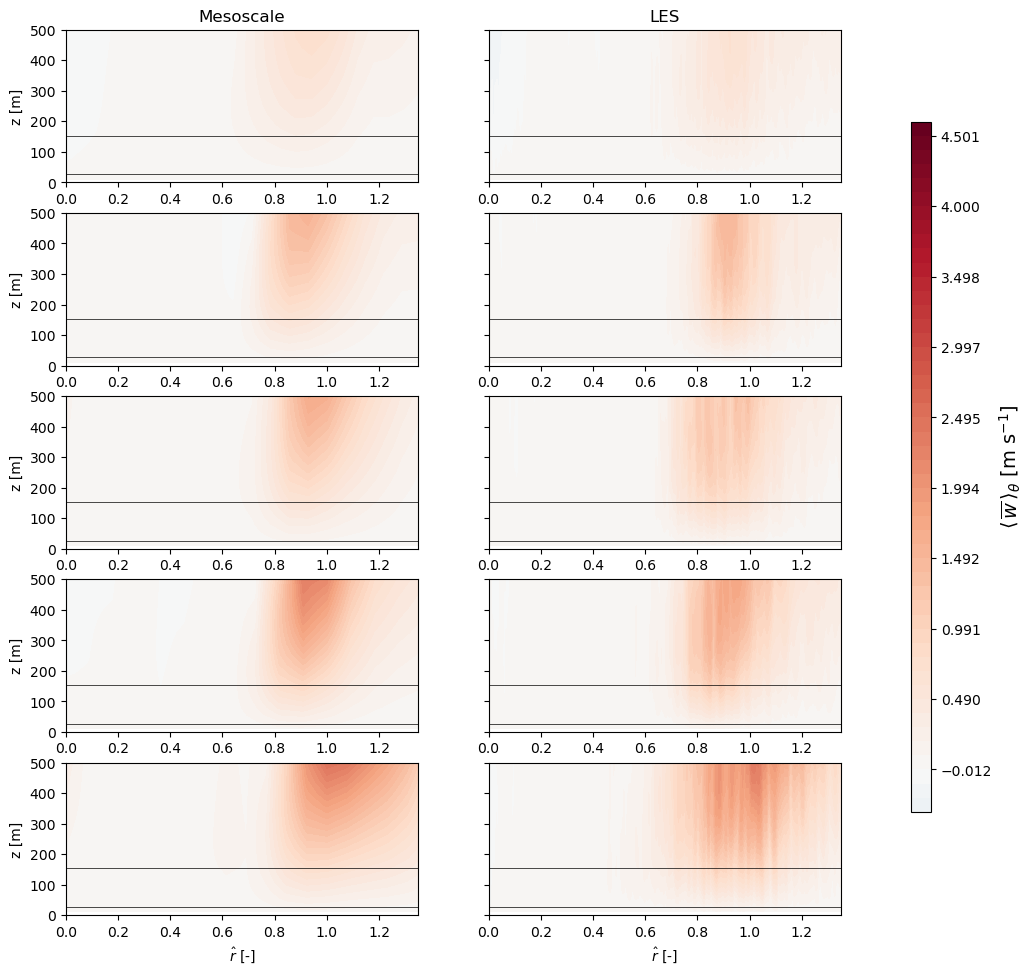

In [38]:
#%% Visualize slice of vertical velocity

# Axes limits
xLim = 1.35 #np.nanmin([np.nanmax(r_d01),np.nanmax(r_d02),np.nanmax(r_d03),np.nanmax(r_d04),np.nanmax(r_d05)])/1000
yLim = 500 #np.nanmin([np.nanmin(z_d01[:,-1]),np.nanmin(z_d02[:,-1]),np.nanmin(z_d03[:,-1]),np.nanmin(z_d04[:,-1]),np.nanmin(z_d05[:,-1])])

# Colormap
maxx = np.max([np.nanmax(w_azm_d01),np.nanmax(w_azm_d02)])#,
#                np.nanmax(w_azm_d03),np.nanmax(w_azm_d04),np.nanmax(w_azm_d05)])
minn = np.min([np.nanmin(w_azm_d01),np.nanmin(w_azm_d02)])#,
#                np.nanmin(w_azm_d03),np.nanmin(w_azm_d04),np.nanmin(w_azm_d05)])
newCmap = cmocean.tools.crop(plt.cm.RdBu_r, 0.9996*minn, 1.0004*maxx, 0)

## Figure
fig3 = plt.figure(figsize=(10,11.5),constrained_layout=False)
gs = fig3.add_gridspec(numSims, len(domains))

for isim in np.arange(numSims):
    ## Domain d01
    f3_ax1 = fig3.add_subplot(gs[isim, 0])
    rr = r_d01[isim,:]/R_d01[isim]
    zz = z_d01[isim,:]
    var = w_azm_d01[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50),cmap=newCmap)#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    plt.ylabel('z [m]')
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]')
    elif isim==0:
        plt.title('Mesoscale')
    
    ## Domain d02
    f3_ax1 = fig3.add_subplot(gs[isim, 1])
    rr = r_d02[isim,:]/R_d02[isim]
    zz = z_d02[isim,:]
    var = w_azm_d02[isim,np.logical_not(np.isnan(zz)),:]
    var = var[:,np.logical_not(np.isnan(rr))]
    im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50),cmap=newCmap)#,vmin=minn,vmax=maxx)
    plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
    plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
    plt.xlim(0,xLim)
    plt.ylim(0,yLim)
    locs,labs = plt.yticks()
    plt.yticks(locs,'')
    plt.ylim(0,yLim)
    if isim==numSims-1:
        plt.xlabel(r'$\hat{r}$ [-]')
    elif isim==0:
        plt.title('LES')
    
    
    if use_prec:
        ## Domain d03
        f3_ax1 = fig3.add_subplot(gs[isim, 2])
        rr = r_d03[isim,:]/R_d03[isim]
        zz = z_d03[isim,:]
        var = w_azm_d03[isim,np.logical_not(np.isnan(zz)),:]
        var = var[:,np.logical_not(np.isnan(rr))]
        im1 = plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50),cmap=newCmap)#,vmin=minn,vmax=maxx)
        plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
        plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
        plt.xlim(0,xLim)
        plt.ylim(0,yLim)
        locs,labs = plt.yticks()
        plt.yticks(locs,'')
        plt.ylim(0,yLim)
        if isim==numSims-1:
            plt.xlabel(r'$\hat{r}$ [-]')
        elif isim==0:
            plt.title('prec')
    
#     ## Domain d04
#     f3_ax1 = fig3.add_subplot(gs[isim, 3])
#     rr = r_d04[isim,:]/R_d04[isim]
#     zz = z_d04[isim,:]
#     var = w_azm_d04[isim,np.logical_not(np.isnan(zz)),:]
#     var = var[:,np.logical_not(np.isnan(rr))]
#     plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50),cmap=newCmap)#,vmin=minn,vmax=maxx)
#     plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
#     plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
#     plt.xlim(0,xLim)
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks()
#     plt.yticks(locs,'')
#     plt.ylim(0,yLim)
#     if isim==numSims-1:
#         plt.xlabel(r'$\hat{r}$ [-]')
#     elif isim==0:
#         plt.title('d04')
    
#     ## Domain d05
#     f3_ax1 = fig3.add_subplot(gs[isim, 4])
#     rr = r_d05[isim,:]/R_d05[isim]
#     zz = z_d05[isim,:]
#     var = w_azm_d05[isim,np.logical_not(np.isnan(zz)),:]
#     var = var[:,np.logical_not(np.isnan(rr))]
#     plt.contourf(rr[np.logical_not(np.isnan(rr))],zz[np.logical_not(np.isnan(zz))],var,levels=np.linspace(minn,maxx,50),cmap=newCmap)#,vmin=minn,vmax=maxx)
#     plt.plot([0,xLim],[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
#     plt.plot([0,xLim],[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
#     plt.xlim(0,xLim)
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks()
#     plt.yticks(locs,'')
#     plt.ylim(0,yLim)
#     if isim==numSims-1:
#         plt.xlabel(r'$\hat{r}$ [-]')
#     elif isim==0:
#         plt.title('d05')
#     plt.annotate(r"$T_s$ = " + WRF_DIRS[isim][-11:-9] + "$^\circ$C", (0.83,(1-isim/numSims)*0.9 - 0.07), xytext=(0.83,(1-isim/numSims)*0.9 - 0.07), xycoords='figure fraction',rotation=90)#, textcoords=None, arrowprops=None, annotation_clip=None)

## Colorbar
# caxCB = fig3.add_axes([0.2, 1.05, 0.6, 0.02])
# cbarr = fig3.colorbar(im1, cax=caxCB, orientation='horizontal',extend='both')
# cbarr.set_label(r'$\overline{U}$ [m s$^{-1}$]',fontsize=14,labelpad=-60)

caxCB = fig3.add_axes([0.97, 0.2, 0.02, 0.6])
cbarr = fig3.colorbar(im1, cax=caxCB, orientation='vertical',extend='both')
cbarr.set_label(r'$\langle\,\overline{w}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/2958558851.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


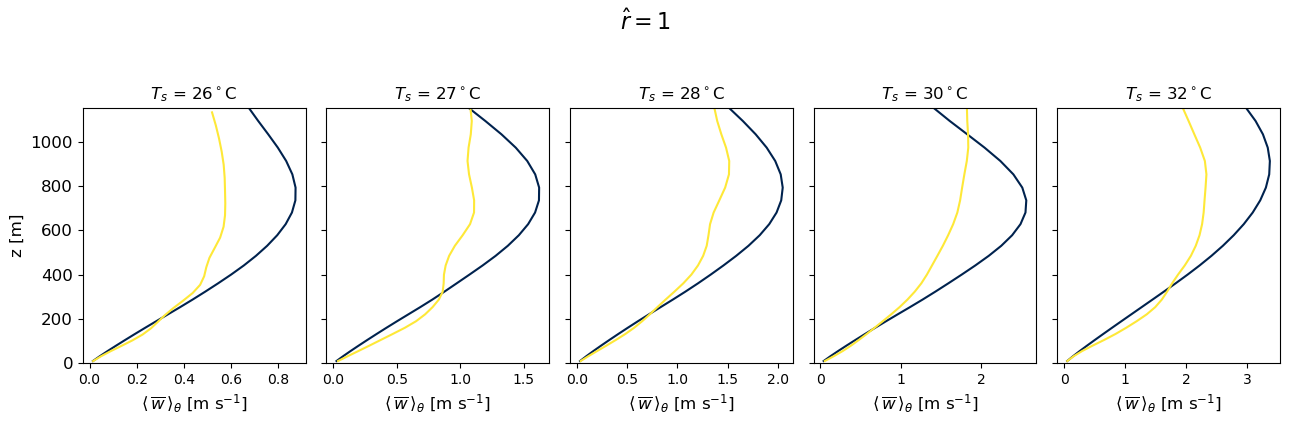

In [39]:
#%% Compare vertical velocity profiles at one radial location
r_norm_loc = 1 #0.8

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])

plt.figure(figsize=(13,4))
plt.suptitle(r"$\hat{r} = $" + str(r_norm_loc),fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(w_azm_d01[isim,:,0])
    for iz in np.arange(len(z_d01[isim,:])):
        var[iz] = np.interp(r_norm_loc,rr,w_azm_d01[isim,iz,:])
    plt.plot(var,z_d01[isim,:],color=cols[0])

    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(w_azm_d02[isim,:,0])
    for iz in np.arange(len(z_d02[isim,:])):
        var[iz] = np.interp(r_norm_loc,rr,w_azm_d02[isim,iz,:])
    plt.plot(var,z_d02[isim,:],color=cols[1])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(w_azm_d03[isim,:,0])
        for iz in np.arange(len(z_d03[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,w_azm_d03[isim,iz,:])
        plt.plot(var,z_d03[isim,:],color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/R_d04[isim]
#     var = np.zeros_like(w_azm_d04[isim,:,0])
#     for iz in np.arange(len(z_d04[isim,:])):
#         var[iz] = np.interp(r_norm_loc,rr,w_azm_d04[isim,iz,:])
#     plt.plot(var,z_d04[isim,:],color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/R_d05[isim]
#     var = np.zeros_like(w_azm_d05[isim,:,0])
#     for iz in np.arange(len(z_d05[isim,:])):
#         var[iz] = np.interp(r_norm_loc,rr,w_azm_d05[isim,iz,:])
#     plt.plot(var,z_d05[isim,:],color=cols[4])
    
    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{w}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
    
plt.tight_layout()
plt.show()



<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/1306223462.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


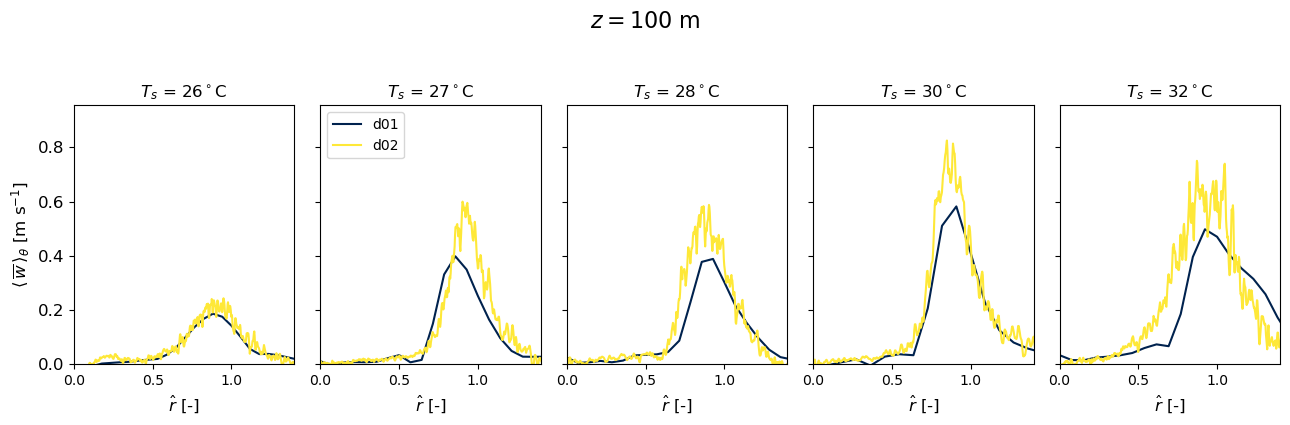

In [40]:
#%% Radial distribution of vertical velocity at one height

zzz = 100

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

iz_temp = np.nanargmin(np.abs(z_d02[-1,:] - zzz))
yLim = [0,1.1*np.nanmax(w_azm_d02[:,iz_temp,:])]
xLim = [0,1.4]

plt.figure(figsize=(13,4))
plt.suptitle(r"$z = $" + str(zzz) + " m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(w_azm_d01[isim,0,:])
    for ir in np.arange(len(r_d01[isim,:])):
        var[ir] = np.interp(zzz,z_d01[isim,:],w_azm_d01[isim,:,ir])
    plt.plot(r_d01[isim,:]/R_d01[isim],var,color=cols[0])
    plt.plot(r_d01[isim,:],0*r_d01[isim,:],'-k',linewidth=0.5)

    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(w_azm_d02[isim,0,:])
    for ir in np.arange(len(r_d02[isim,:])):
        var[ir] = np.interp(zzz,z_d02[isim,:],w_azm_d02[isim,:,ir])
    plt.plot(r_d02[isim,:]/R_d02[isim],var,color=cols[1])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(w_azm_d03[isim,0,:])
        for ir in np.arange(len(r_d03[isim,:])):
            var[ir] = np.interp(zzz,z_d03[isim,:],w_azm_d03[isim,:,ir])
        plt.plot(r_d03[isim,:]/R_d03[isim],var,color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/R_d04[isim]
#     var = np.zeros_like(w_azm_d04[isim,0,:])
#     for ir in np.arange(len(r_d04[isim,:])):
#         var[ir] = np.interp(zzz,z_d04[isim,:],w_azm_d04[isim,:,ir])
#     plt.plot(r_d04[isim,:]/R_d04[isim],var,color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/R_d05[isim]
#     var = np.zeros_like(w_azm_d05[isim,0,:])
#     for ir in np.arange(len(r_d05[isim,:])):
#         var[ir] = np.interp(zzz,z_d05[isim,:],w_azm_d05[isim,:,ir])
#     plt.plot(r_d05[isim,:]/R_d05[isim],var,color=cols[4])
    
    ## Labels and limits
    if isim==len(domains)-1:
        plt.plot([0,0],[-1,-1],color=cols[0],label='d01')
        plt.plot([0,0],[-1,-1],color=cols[1],label='d02')
        if use_prec:
            plt.plot([0,0],[-1,-1],color=cols[2],label='d03')
#         plt.plot([0,0],[-1,-1],color=cols[3],label='d04')
#         plt.plot([0,0],[-1,-1],color=cols[4],label='d05')
        plt.legend(loc=2)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{w}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlim(xLim)
    plt.xlabel(r'$\hat{r}$ [-]',fontsize=12)
    
plt.tight_layout()
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:89: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2096981/1913767923.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + WRF_DIRS[isim][-11:-9] + "$^\circ$C")
/tmp/ipykernel_2096981/1913767923.py:89: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\overline{w}$ [m s$^{-1}$]',fontsize=14)


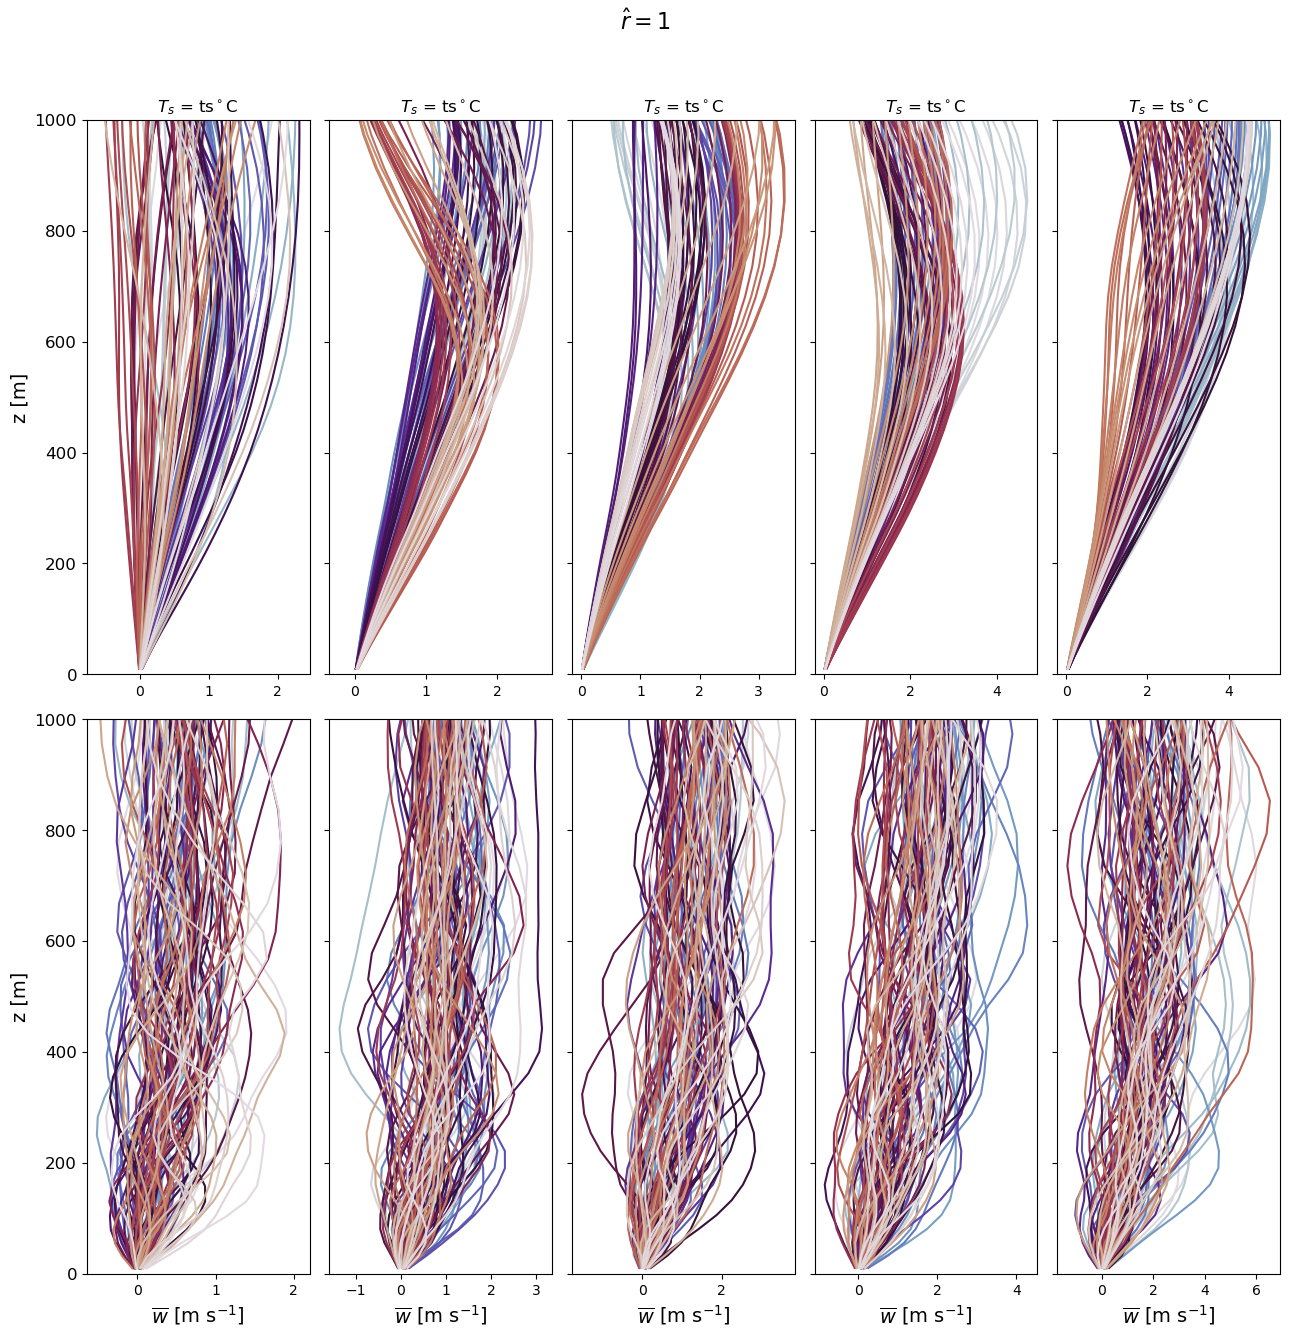

In [41]:
#%% Investigate time-averaged vertical wind speed for all azimuth angles

r_norm_loc = 1

cols = plt.cm.plasma(np.linspace(0,1,np.shape(w_d02)[1]))
cols = plt.cm.twilight(np.linspace(0,1,np.shape(w_d02)[1]))

yLim = 1000

plt.figure(figsize=(13,13))
plt.suptitle(r"$\hat{r} = $" + str(r_norm_loc),fontsize=16,y=1.025)
for isim in np.arange(numSims):
    ## Domain d01
    plt.subplot(len(domains),numSims,isim+1+numSims*0)
    plt.title(r"$T_s$ = " + WRF_DIRS[isim][-11:-9] + "$^\circ$C")
    rr = r_d01[isim,:]/R_d01[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(w_d01)[1]):
        plt.plot(w_d01[isim,ia,:,ir],z_d01[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    ## Domain d02
    plt.subplot(len(domains),numSims,isim+1+numSims*1)
    rr = r_d02[isim,:]/R_d02[isim]
    ir = np.nanargmin(np.abs(rr - r_norm_loc))
    for ia in np.arange(np.shape(w_d02)[1]):
        plt.plot(w_d02[isim,ia,:,ir],z_d02[isim,:],color=cols[ia])
        
    plt.ylim(0,yLim)
    locs,labs = plt.yticks(fontsize=12)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
    else:
        plt.yticks(locs,'')
    plt.ylim(0,yLim)
    
    if use_prec:
        ## Domain d03
        plt.subplot(len(domains),numSims,isim+1+numSims*2)
        rr = r_d03[isim,:]/R_d03[isim]
        ir = np.nanargmin(np.abs(rr - r_norm_loc))
        for ia in np.arange(np.shape(w_d03)[1]):
            plt.plot(w_d03[isim,ia,:,ir],z_d03[isim,:],color=cols[ia])

        plt.ylim(0,yLim)
        locs,labs = plt.yticks(fontsize=12)
        if isim==0:
            plt.ylabel('z [m]',fontsize=14)
        else:
            plt.yticks(locs,'')
        plt.ylim(0,yLim)
    
#     ## Domain d04
#     plt.subplot(len(domains),numSims,isim+1+numSims*3)
#     rr = r_d04[isim,:]/R_d04[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(w_d04)[1]):
#         plt.plot(w_d04[isim,ia,:,ir],z_d04[isim,:],color=cols[ia])
        
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks(fontsize=12)
#     if isim==0:
#         plt.ylabel('z [m]',fontsize=14)
#     else:
#         plt.yticks(locs,'')
#     plt.ylim(0,yLim)
    
#     ## Domain d05
#     plt.subplot(len(domains),numSims,isim+1+numSims*4)
#     rr = r_d05[isim,:]/R_d05[isim]
#     ir = np.nanargmin(np.abs(rr - r_norm_loc))
#     for ia in np.arange(np.shape(w_d05)[1]):
#         plt.plot(w_d05[isim,ia,:,ir],z_d05[isim,:],color=cols[ia])
        
#     plt.ylim(0,yLim)
#     locs,labs = plt.yticks(fontsize=12)
#     if isim==0:
#         plt.ylabel('z [m]',fontsize=14)
#     else:
#         plt.yticks(locs,'')
    plt.ylim(0,yLim)
    plt.xlabel('$\overline{w}$ [m s$^{-1}$]',fontsize=14)
plt.tight_layout()
plt.show()

## Veer

In [42]:
#%% Calculate wind direction

## Domain d01
wDir_d01 = np.zeros(np.shape(Un_azm_d01))
for isim in np.arange(numSims):
    for iz in np.arange(len(z_d01[isim,:])):
        uu = np.zeros_like(Un_azm_d01[isim,iz,:]) + Un_azm_d01[isim,iz,:]
        vv = np.zeros_like(Ut_azm_d01[isim,iz,:]) + Ut_azm_d01[isim,iz,:]
        wDir_d01[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# Wind direction in engineering coordinates (from [1,0] vector )
wDir_d01[wDir_d01<0] = (180 + wDir_d01[wDir_d01<0]) + 180

## Domain d02
wDir_d02 = np.zeros(np.shape(Un_azm_d02))
for isim in np.arange(numSims):
    for iz in np.arange(len(z_d02[isim,:])):
        uu = np.zeros_like(Un_azm_d02[isim,iz,:]) + Un_azm_d02[isim,iz,:]
        vv = np.zeros_like(Ut_azm_d02[isim,iz,:]) + Ut_azm_d02[isim,iz,:]
        wDir_d02[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# Wind direction in engineering coordinates (from [1,0] vector )
wDir_d02[wDir_d02<0] = (180 + wDir_d02[wDir_d02<0]) + 180

if use_prec:
    ## Domain d03
    wDir_d03 = np.zeros(np.shape(Un_azm_d03))
    for isim in np.arange(numSims):
        for iz in np.arange(len(z_d03[isim,:])):
            uu = np.zeros_like(Un_azm_d03[isim,iz,:]) + Un_azm_d03[isim,iz,:]
            vv = np.zeros_like(Ut_azm_d03[isim,iz,:]) + Ut_azm_d03[isim,iz,:]
            wDir_d03[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
    # Wind direction in engineering coordinates (from [1,0] vector )
    wDir_d03[wDir_d03<0] = (180 + wDir_d03[wDir_d03<0]) + 180

# ## Domain d04
# wDir_d04 = np.zeros(np.shape(Un_azm_d04))
# for isim in np.arange(numSims):
#     for iz in np.arange(len(z_d04[isim,:])):
#         uu = np.zeros_like(Un_azm_d04[isim,iz,:]) + Un_azm_d04[isim,iz,:]
#         vv = np.zeros_like(Ut_azm_d04[isim,iz,:]) + Ut_azm_d04[isim,iz,:]
#         wDir_d04[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# # Wind direction in engineering coordinates (from [1,0] vector )
# wDir_d04[wDir_d04<0] = (180 + wDir_d04[wDir_d04<0]) + 180

# ## Domain d05
# wDir_d05 = np.zeros(np.shape(Un_azm_d05))
# for isim in np.arange(numSims):
#     for iz in np.arange(len(z_d05[isim,:])):
#         uu = np.zeros_like(Un_azm_d05[isim,iz,:]) + Un_azm_d05[isim,iz,:]
#         vv = np.zeros_like(Ut_azm_d05[isim,iz,:]) + Ut_azm_d05[isim,iz,:]
#         wDir_d05[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# # Wind direction in engineering coordinates (from [1,0] vector )
# wDir_d05[wDir_d05<0] = (180 + wDir_d05[wDir_d05<0]) + 180


In [43]:
# Define function that estimates vertical change in wind direction at one location
def delta_wDir_twoZ(wDir_z1,wDir_z2,z1,z2,normalize):
    wDir_low = wDir_z1
    wDir_high = wDir_z2
    
    delta = 0
    
    a = np.abs(wDir_high-wDir_low)
    b = np.abs(360-a)
    delta = np.min([a,b])

    if (wDir_high>=0) & (wDir_high<=90):
        if (wDir_low>=270) & (wDir_low<=360):
            delta = 1*delta
    elif (wDir_high>=270) & (wDir_high<=360):
        if (wDir_low>=0) & (wDir_low<=90):
            delta = -1*delta

    dz = z2-z1
    if dz>0:
        if normalize:
            delta = delta/dz
        
    return delta

In [44]:
#%% Calculate veer over layer at each radial location

normalize = False

# Heights for veer
z_top = z_hh + 0.5*D_turb
z_bott = z_hh - 0.5*D_turb

## Domain d01
veer_d01 = np.zeros_like(wDir_d01[:,0,:])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_d01[isim,:])):
        dir_bott = np.interp(z_bott,z_d01[isim,:],wDir_d01[isim,:,ir])
        dir_top = np.interp(z_top,z_d01[isim,:],wDir_d01[isim,:,ir])
        veer_d01[isim,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

## Domain d02
veer_d02 = np.zeros_like(wDir_d02[:,0,:])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_d02[isim,:])):
        dir_bott = np.interp(z_bott,z_d02[isim,:],wDir_d02[isim,:,ir])
        dir_top = np.interp(z_top,z_d02[isim,:],wDir_d02[isim,:,ir])
        veer_d02[isim,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

if use_prec:
    ## Domain d03
    veer_d03 = np.zeros_like(wDir_d03[:,0,:])
    for isim in np.arange(numSims):
        for ir in np.arange(len(r_d03[isim,:])):
            dir_bott = np.interp(z_bott,z_d03[isim,:],wDir_d03[isim,:,ir])
            dir_top = np.interp(z_top,z_d03[isim,:],wDir_d03[isim,:,ir])
            veer_d03[isim,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

# ## Domain d04
# veer_d04 = np.zeros_like(wDir_d04[:,0,:])
# for isim in np.arange(numSims):
#     for ir in np.arange(len(r_d04[isim,:])):
#         dir_bott = np.interp(z_bott,z_d04[isim,:],wDir_d04[isim,:,ir])
#         dir_top = np.interp(z_top,z_d04[isim,:],wDir_d04[isim,:,ir])
#         veer_d04[isim,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

# ## Domain d05
# veer_d05 = np.zeros_like(wDir_d05[:,0,:])
# for isim in np.arange(numSims):
#     for ir in np.arange(len(r_d05[isim,:])):
#         dir_bott = np.interp(z_bott,z_d05[isim,:],wDir_d05[isim,:,ir])
#         dir_top = np.interp(z_top,z_d05[isim,:],wDir_d05[isim,:,ir])
#         veer_d05[isim,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2096981/933529082.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


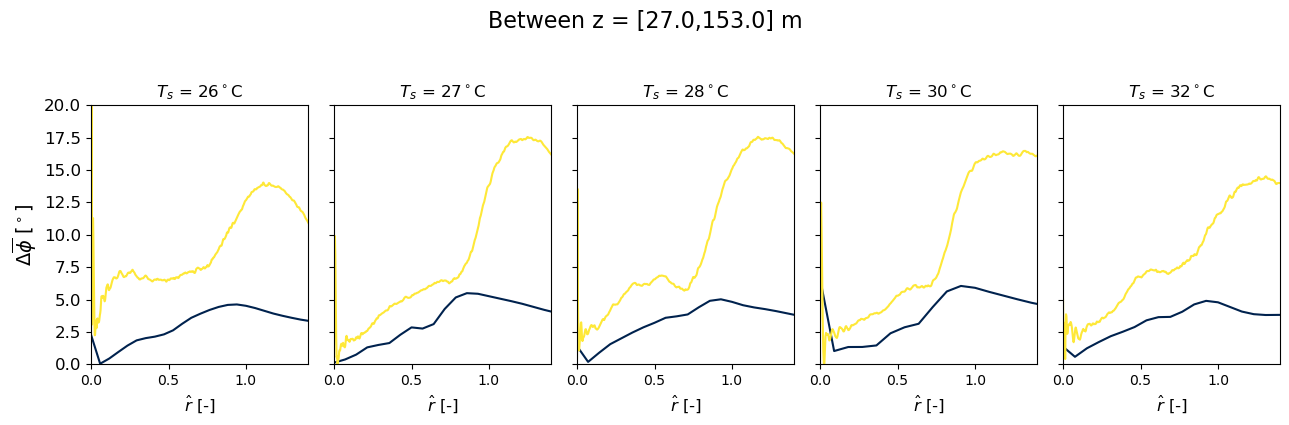

In [45]:
#%% Radial distribution of veer

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,20]
xLim = [0,1.4]

plt.figure(figsize=(13,4))
plt.suptitle(r"Between z = [" + str(z_bott) +","+str(z_top) + "] m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    ## Domain d01
    plt.plot(r_d01[isim,:]/R_d01[isim],veer_d01[isim,:],color=cols[0])
    
    ## Domain d02
    plt.plot(r_d02[isim,:]/R_d02[isim],veer_d02[isim,:],color=cols[1])
    
    if use_prec:
        ## Domain d03
        plt.plot(r_d03[isim,:]/R_d03[isim],veer_d03[isim,:],color=cols[2])
    
#     ## Domain d04
#     plt.plot(r_d04[isim,:]/R_d04[isim],veer_d04[isim,:],color=cols[3])
    
#     ## Domain d05
#     plt.plot(r_d05[isim,:]/R_d05[isim],veer_d05[isim,:],color=cols[4])

    ## Labels and limits
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\Delta\overline{\phi}$ [$^\circ$]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlim(xLim)
    plt.xlabel(r'$\hat{r}$ [-]',fontsize=12)
    
plt.tight_layout()
plt.show()

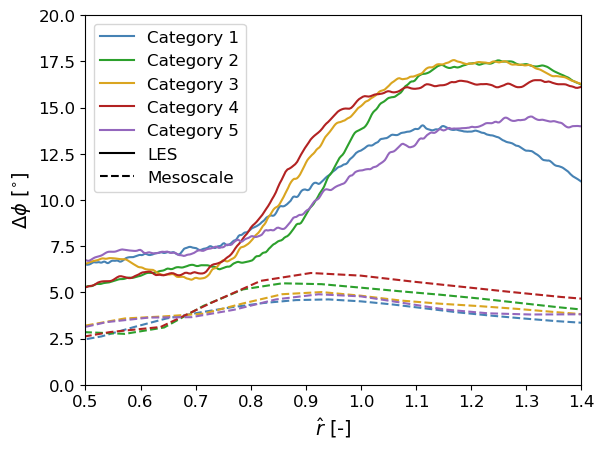

In [46]:
plt.figure()
for isim in np.arange(numSims):
    plt.plot(r_d02[isim,:]/R_d02[isim],veer_d02[isim,:],color=colores[isim],linestyle='-',label="Category " + labels_cat[isim])
    plt.plot(r_d01[isim,:]/R_d01[isim],veer_d01[isim,:],color=colores[isim],linestyle='--')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='-',label='LES')
plt.plot(-1*r_d02[isim,:]/R_d01[isim],-1*alpha_d02[isim,:],color='black',linestyle='--',label='Mesoscale')
plt.xlim(0.5,1.4)
plt.ylim(0,20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$\hat{r}$ [-]",fontsize=14)
plt.ylabel(r"$\Delta\phi$ [$^{\circ}$]",fontsize=14)
plt.legend(fontsize=12,loc=2)
plt.savefig(dirFig + "veer.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


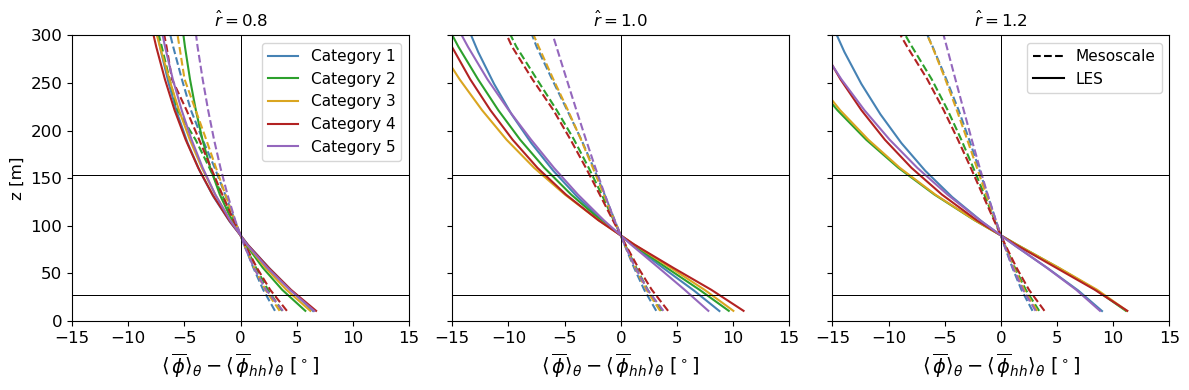

In [47]:
#%% Wind direction profiles (zero at hub height)

#%% Compare radial velocity profiles at various radial location
r_norm_loc = [0.8,1.0,1.2]

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,300]
xLim = [-15,15]

plt.figure(figsize=(12,4))
for irir in np.arange(len(r_norm_loc)):
    for isim in np.arange(numSims):
        plt.subplot(1,len(r_norm_loc),irir + 1)
        if isim==0:
            plt.title(r"$\hat{r} = $" + str(r_norm_loc[irir]))
        ## Domain d01
        rr = r_d01[isim,:]/R_d01[isim]
        var = np.zeros_like(Un_azm_d01[isim,:,0])
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc[irir],rr,wDir_d01[isim,iz,:])
        var = var - np.interp(z_hh,z_d01[isim,:],var)
        plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')

        ## Domain d02
        rr = r_d02[isim,:]/R_d02[isim]
        var = np.zeros_like(Un_azm_d02[isim,:,0])
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc[irir],rr,wDir_d02[isim,iz,:])
        var = var - np.interp(z_hh,z_d02[isim,:],var)
        if (irir==0):
            plt.plot(var,z_d02[isim,:],color=colores[isim],linestyle='-',label="Category " + labels_cat[isim])
        else:
            plt.plot(var,z_d02[isim,:],color=colores[isim],linestyle='-')
        
        ## Rotor layer
        plt.plot([0,0],yLim,'-k',linewidth=0.5)
        plt.plot(xLim,[z_hh + 0.5*D_turb,z_hh + 0.5*D_turb],'-k',linewidth=0.5)
        plt.plot(xLim,[z_hh - 0.5*D_turb,z_hh - 0.5*D_turb],'-k',linewidth=0.5)
        
        ## Labels and limits
        if (isim==numSims-1) & (irir==0):
            # plt.plot(np.array([0,0]),[-1,-1],color='black',label='Mesoscale',linestyle='--')
            # plt.plot(np.array([0,0]),[-1,-1],color='black',label='LES')
            plt.legend(loc=1,fontsize=11)
        if (isim==0) & (irir==len(r_norm_loc)-1):
            p1 = plt.plot(np.array([0,0]),[-1,-1],color='black',label='Mesoscale',linestyle='--')
            p2 = plt.plot(np.array([0,0]),[-1,-1],color='black',label='LES')
            plt.legend(loc=1,fontsize=11)
        plt.ylim(yLim)
        plt.xlim(xLim)
        if irir==0:
            plt.ylabel('z [m]',fontsize=12)
            locs,labs = plt.yticks(fontsize=12)
        else:
            plt.yticks(locs,'')
        plt.ylim(yLim)
        plt.xlabel(r'$\langle\,\overline{\phi}\rangle_{\theta} - \langle\,\overline{\phi}_{hh}\rangle_{\theta}$ [$^\circ$]',fontsize=14)
        plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig(dirFig + "dirChange.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()



In [48]:
STOP

NameError: name 'STOP' is not defined